In [1]:
from time import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix, coo_matrix
from qiskit import transpile, execute, ClassicalRegister, QuantumCircuit, Aer
#from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator, Pauli
#from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel

from utilities import startup, bit_str_list, run_cal, check_provider
from moment_method import MomentMethod, find_closest_pvec
#from free_entanglebase import Free_EntangleBase

provider = startup(hub='ibm-q-melbourne', group='unimelb', project='hub')
backend = provider.get_backend('ibm_brisbane')

Account enabled
Provider: ibm-q-melbourne-unimelb-hub


In [1]:
from time import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix, coo_matrix

# Qiskit
from qiskit import transpile, ClassicalRegister, execute, QuantumCircuit, Aer
from qiskit_ibm_provider import IBMProvider
from qiskit.providers.aer.noise import NoiseModel
# Local modules
from utilities import startup, check_provider, IBM_startup
from moment_method import MomentMethod, find_closest_pvec, find_closest_counts

hub = "ibm-q-melbourne"
group = "unimelb"
project = "hub"
backend_name = 'ibm_cairo'
hgp = f"{hub}/{group}/{project}"

provider = IBM_startup()
#provider = IBMProvider()
backend = provider.get_backend(backend_name, instance=hgp)
print(backend.properties().backend_name)

Account enabled
ibm_cairo


In [1]:
from time import time
import pickle
import numpy as np
import matplotlib.pyplot as plt

from utilities import IBM_startup, bit_str_list, run_cal
from moment_method import MomentMethod, find_closest_pvec

#qiskit
from qiskit import transpile, execute, QuantumCircuit, ClassicalRegister
from qiskit.circuit.random import random_circuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Options
from qiskit_ibm_runtime.options import Options
#service = QiskitRuntimeService()
#backend = service.backend("ibm_sherbrooke")

In [4]:
service = QiskitRuntimeService()
backend = service.backend('ibmq_qasm_simulator')
options = Options()
options.execution.shots = 1000
options.max_execution_time = 7200 #check this later
options.optimization_level = 1

circuit = QuantumCircuit(4)
circuit.x(3)
cr = ClassicalRegister(3)
circuit.add_register(cr)
circuit.measure([1,2,3], cr)
with Session(service=service, backend=backend) as session:
    sampler = Sampler(session=session, options=options)
    job = sampler.run(circuit)

In [26]:
display(circuit.draw())
result = job.result()
print(result)

┌───┐   ┌─┐   
 q_0: ┤ X ├───┤M├───
      ├───┤   └╥┘┌─┐
 q_1: ┤ X ├────╫─┤M├
      └┬─┬┘    ║ └╥┘
 q_2: ─┤M├─────╫──╫─
       └╥┘ ┌─┐ ║  ║ 
 q_3: ──╫──┤M├─╫──╫─
        ║  └╥┘ ║  ║ 
c2: 2/══╬═══╬══╩══╩═
        ║   ║  0  1 
c3: 2/══╩═══╩═══════
        0   1

SamplerResult(quasi_dists=[{3: 1.0}], metadata=[{'shots': 1000}])


In [5]:
display(circuit.draw())
result = job.result()
print(result)

q_0: ──────────────
           ┌─┐      
 q_1: ─────┤M├──────
           └╥┘┌─┐   
 q_2: ──────╫─┤M├───
      ┌───┐ ║ └╥┘┌─┐
 q_3: ┤ X ├─╫──╫─┤M├
      └───┘ ║  ║ └╥┘
c0: 3/══════╩══╩══╩═
            0  1  2

SamplerResult(quasi_dists=[{4: 1.0}], metadata=[{'shots': 1000}])


In [4]:
backend = provider.get_backend('ibmq_mumbai')
test = MomentMethod(backend, qubits_to_connect=list(range(len(backend.properties().qubits))))
test.circuit, test.initial_layout = test.gen_ghz_circuit(10)
print(test.nqubits)
print(test.initial_layout)
print(test.ghz_edges)
print('GHZ Circuit Depth:', test.circuit.depth())
test.circuit.draw()
test.Hamiltonian = test.gen_GHZ_Hamiltonian()
print(test.to_string(test.Hamiltonian))
test.gen_Hamiltonian_powers(order = 4)
test.gen_TPB_set()
#for operator in test.TPB_sets[0]:
#    print(test.operator_to_string(operator))
moment_circuits = test.gen_measurement_circuits()
print(moment_circuits)
moment_circuits['XXYYYXYYYX'].draw()

10
[22, 25, 19, 24, 23, 16, 26, 14, 21, 20]
[(22, 25), (22, 19), (25, 24), (24, 23), (19, 16), (25, 26), (16, 14), (23, 21), (19, 20)]
GHZ Circuit Depth: 5
-0.1*IIIIIZIIZI-0.1*IIZIIZIIII-0.1*IIIIIIIZZI-0.1*IIIIIIZZII-0.1*IZZIIIIIII-0.1*IIIIIIIIZZ-0.1*ZZIIIIIIII-0.1*IIIIZIZIII-0.1*IIZZIIIIII-0.1*XXXXXXXXXX
{'XXYYYXYYYX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001467A80AF20>, 'ZZZZZZZZZZ': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001467AB74DC0>, 'XYYXXXXXXX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001467AB742E0>, 'YXYXXXXXXX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001467AB75FF0>, 'YYXXXXXXXX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001467AB76E60>, 'XXYYXYYYYX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001467AB77C70>, 'YYYXXXXXYX': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001467A8D8C40>, 'XXXYXYXXXX': <qiskit.circuit.quantumcircuit.QuantumCir

░                                        
    q_0: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_1: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_2: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_3: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_4: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_5: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_6: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_7: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_8: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
    q_9: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
   q_10: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
   q_11: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
   q_12: ──────────────────────────░────────────────────────────────────────
                                   ░                                        
   q_13: ──────────────────────────░────────────────────────────────────────
                             ┌───┐ ░  ┌───┐      ┌─┐                        
   q_14: ────────────────────┤ X ├─░──┤ H ├──────┤M├────────────────────────
                             └─┬─┘ ░  └───┘      └╥┘                        
   q_15: ──────────────────────┼───░──────────────╫─────────────────────────
                        ┌───┐  │   ░  ┌───┐       ║ ┌─┐                     
   q_16: ───────────────┤ X ├──■───░──┤ H ├───────╫─┤M├─────────────────────
                        └─┬─┘      ░  └───┘       ║ └╥┘                     
   q_17: ─────────────────┼────────░──────────────╫──╫──────────────────────
                          │        ░              ║  ║                      
   q_18: ─────────────────┼────────░──────────────╫──╫──────────────────────
                   ┌───┐  │        ░ ┌─────┐┌───┐ ║  ║    ┌─┐               
   q_19: ──────────┤ X ├──■────■───░─┤ Sdg ├┤ H ├─╫──╫────┤M├───────────────
                   └─┬─┘     ┌─┴─┐ ░ ├─────┤├───┤ ║  ║    └╥┘┌─┐            
   q_20: ────────────┼───────┤ X ├─░─┤ Sdg ├┤ H ├─╫──╫─────╫─┤M├────────────
                     │       ├───┤ ░ ├─────┤├───┤ ║  ║     ║ └╥┘┌─┐         
   q_21: ────────────┼───────┤ X ├─░─┤ Sdg ├┤ H ├─╫──╫─────╫──╫─┤M├─────────
         ┌───┐       │       └─┬─┘ ░ └┬───┬┘└───┘ ║  ║ ┌─┐ ║  ║ └╥┘         
   q_22: ┤ H ├──■────■─────────┼───░──┤ H ├───────╫──╫─┤M├─╫──╫──╫──────────
         └───┘  │       ┌───┐  │   ░ ┌┴───┴┐┌───┐ ║  ║ └╥┘ ║  ║  ║ ┌─┐      
   q_23: ───────┼───────┤ X ├──■───░─┤ Sdg ├┤ H ├─╫──╫──╫──╫──╫──╫─┤M├──────
                │  ┌───┐└─┬─┘      ░ ├─────┤├───┤ ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_24: ───────┼──┤ X ├──■────────░─┤ Sdg ├┤ H ├─╫──╫──╫──╫──╫──╫──╫─┤M├───
              ┌─┴─┐└─┬─┘           ░ ├─────┤├───┤ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_25: ─────┤ X ├──■────■────────░─┤ Sdg ├┤ H ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├
              └───┘     ┌─┴─┐  

GHZ state moment method

In [14]:
backend = provider.get_backend('ibmq_mumbai')
test = MomentMethod(backend, qubits_to_connect=list(range(len(backend.properties().qubits))))
test.circuit, test.initial_layout = test.gen_ghz_circuit(10)
test.Hamiltonian = test.gen_GHZ_Hamiltonian()
print(test.initial_layout)
print(test.circuit.depth())
print(test.to_string(test.Hamiltonian, index = 0))
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)

moment_circuits = test.gen_measurement_circuits()
circ_list = []
for circ in moment_circuits.values():
    circ_list.append(circ)
circ_list_multi = []
for i in range(4):
    for circ in circ_list:
        name_ext = circ.name + f'-{i}'
        circ_list_multi.append(circ.copy(name_ext))
circ_list = circ_list_multi

qrem_circuits = test.gen_qrem_circuits()
circ_list.extend(qrem_circuits)
print(len(circ_list))
circ_list = transpile(circ_list, backend=backend)
job_manager = IBMQJobManager()
job_set = job_manager.run(circ_list, backend=backend, shots=8192)
print(job_set.job_set_id())
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

#job = test.run_moment_circuits(order=4, reps=1, shots=8192, qrem = True, sim='ideal')
#print('job Done')

#time3 = time()
#result = job.result()
#time4 = time()
#print(f'Time elapsed: {time4 - time3:.2f} s')

#moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
#moments_dict_mit = test.moments_from_result(result, apply_mit = 'QREM', order = 4)
#print(moments_dict)
#print(moments_dict_mit)
#cummulants = test.cummulants_from_moments(moments_dict)
#cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
#print(cummulants)
#print(cummulants_mit)
#s_stars = test.s_star_from_cummulants(cummulants)
#s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
#fidelities = np.ones(1)-np.array(s_stars)
#fidelities_mit = np.ones(1)-np.array(s_stars_mit)
#print(f'Fidelities: {fidelities}')
#print(f'Mitigated Fidelities: {fidelities_mit}')
#energies = test.energy_from_cummualnts(cummulants)
#energies_mit = test.energy_from_cummualnts(cummulants_mit)
#print(f'Ground state energy: {energies}')
#print(f'Mitigated Ground state energy: {energies_mit}')
#time5 = time()
#print(f'Time elapsed: {time5 - time4:.2f} s')

[22, 19, 25, 16, 14, 24, 20, 23, 13, 26]
5
-0.1*IIIZIZIIII-0.1*IIIIIZIIZI-0.1*IIZZIIIIII-0.1*IZZIIIIIII-0.1*IIIIIIIZZI-0.1*IIIZZIIIII-0.1*IIIIIIZZII-0.1*ZZIIIIIIII-0.1*IIIIIIIIZZ-0.1*XXXXXXXXXX
Time elapsed: 0.01 s
Time elapsed: 0.00 s
131
386
526
689489a227c64bb782c1c83798af0836-16853371359045055
Time elapsed: 9.25 s


[5, 3, 1, 6, 4, 0, 2]
5
-0.14285714285714285*IIIZIZI-0.14285714285714285*IZIZIII-0.14285714285714285*IIIIIZZ-0.14285714285714285*IIIIZZI-0.14285714285714285*ZZIIIII-0.14285714285714285*IZZIIII-0.14285714285714285*XXXXXXX
Time elapsed: 0.01 s
43
99
Time elapsed: 9.91 s
Moments: {1: [(-0.8078613281249999+0j), (-0.8142787388392857+0j), (-0.814418247767857+0j), (-0.8119768415178571+0j), (-0.8171386718749999+0j), (-0.8129185267857142+0j), (-0.8134416852678572+0j), (-0.8195452008928571+0j)], 2: [(0.745047433035714+0j), (0.7527802136479592+0j), (0.747817681760204+0j), (0.7460738201530611+0j), (0.7535375478316326+0j), (0.7489337531887754+0j), (0.7479571906887754+0j), (0.7515644929846939+0j)], 3: [(-0.6986343784165452+0j), (-0.7035698626548834+0j), (-0.7035129202350583+0j), (-0.7013661910076529+0j), (-0.7076383985513848+0j), (-0.7011334388666183+0j), (-0.7031812306395773+0j), (-0.7076149098032073+0j)], 4: [(0.6731614919564766+0j), (0.6805477372709288+0j), (0.6774338003696376+0j), (0.67453746485

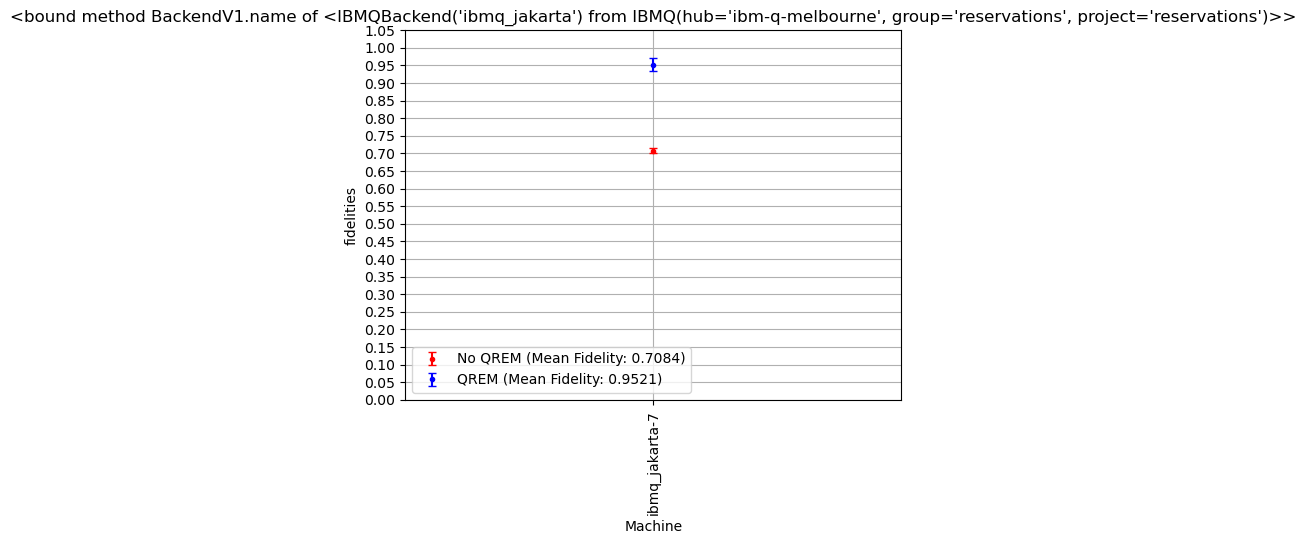

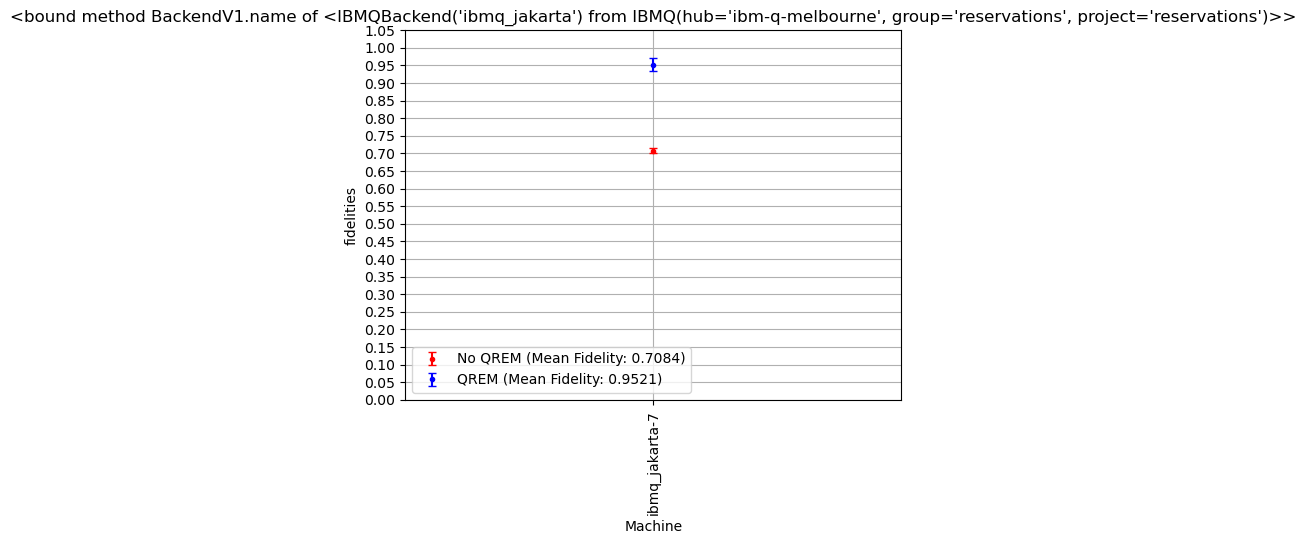

In [6]:
backend = provider.get_backend('ibmq_mumbai')
test = MomentMethod(backend, qubits_to_connect=list(range(len(backend.properties().qubits))))
test.circuit, test.initial_layout = test.gen_ghz_circuit(10)
test.Hamiltonian = test.gen_GHZ_Hamiltonian()
print(test.initial_layout)
print(test.circuit.depth())
print(test.to_string(test.Hamiltonian, index = 0))
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
test.gen_TPB_set()
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()

job_manager = IBMQJobManager()
# mumbai 10-qubit GHZ state moment method 
job_set = job_manager.retrieve_job_set('689489a227c64bb782c1c83798af0836-16853371359045055', provider)
#jakarta 7-qubit GHZ state moment method
#job_set = job_manager.retrieve_job_set('ebb4b90657f449f59779868aab02886d-16805725436219158', provider)
#nairobi 7-qubit GHZ state moment method
#job_set = job_manager.retrieve_job_set('e57ab150dee84ab8a814a01ecac221a9-16803091361903622', provider)
results = job_set.results()
result = results.combine_results()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
moments_dict_mit = test.moments_from_result(result, apply_mit = 'QREM', order = 4)
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')
plot_fidelities(fidelities, backend, fidelities_mit)

Mumbai: 15-qubit GHZ state fidelity

[16, 14, 19, 13, 12, 11, 22, 8, 25, 15, 20, 18, 10, 5, 24]
6
-0.06666666666666667*IIIIIIZIZIIIIII-0.06666666666666667*IIIIIIIIZIZIIII-0.06666666666666667*IIIIIZZIIIIIIII-0.06666666666666667*IIIIZZIIIIIIIII-0.06666666666666667*IIIZIIZIIIIIIII-0.06666666666666667*IIIIIIIIIIZIZII-0.06666666666666667*IZIZIIIIIIIIIII-0.06666666666666667*IIIIIIIIIIIIZIZ-0.06666666666666667*IIIIZIIZIIIIIII-0.06666666666666667*IIIIIIIIIIZZIII-0.06666666666666667*IIIIIIIZIZIIIII-0.06666666666666667*IIZIZIIIIIIIIII-0.06666666666666667*ZZIIIIIIIIIIIII-0.06666666666666667*IIIIIIIIIIIIIZZ-0.06666666666666667*XXXXXXXXXXXXXXX
Time elapsed: 0.10 s
471
1941
Time elapsed: 678.24 s
unmitigated moments done
rep 0 done
rep 1 done
rep 2 done
rep 3 done
Moments: {1: [(-0.4680501302083333+0j), (-0.5625813802083333+0j), (-0.58955078125+0j), (-0.6089680989583334+0j)], 2: [(0.4152842881944443+0j), (0.46675130208333326+0j), (0.4778407118055553+0j), (0.4859049479166667+0j)], 3: [(-0.3473961950231481+0j), (-0.39406112557870365+0j),

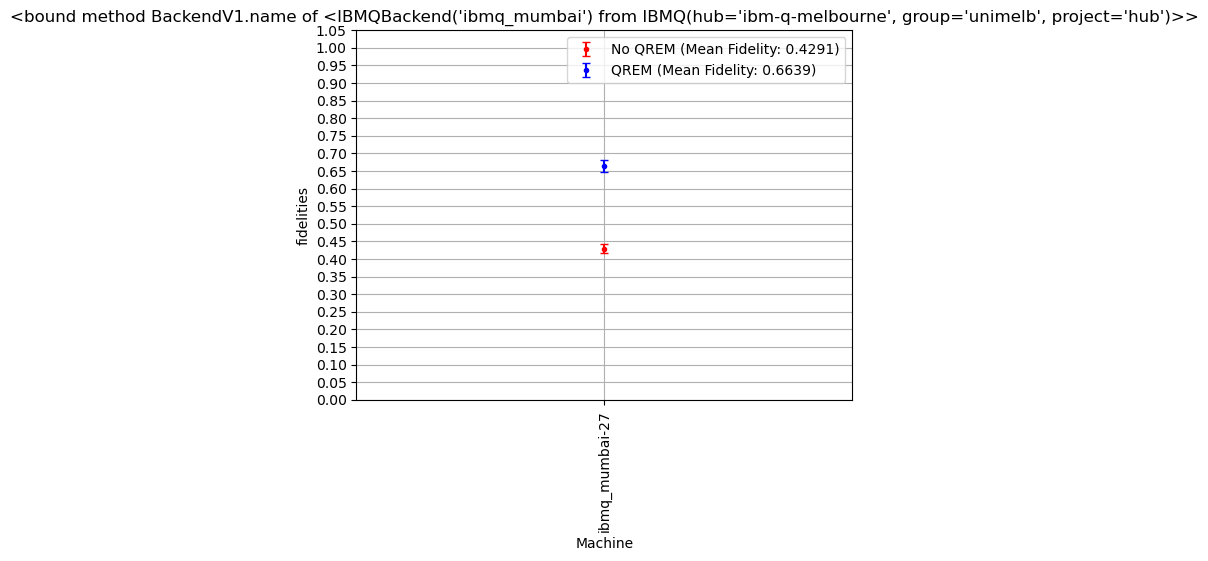

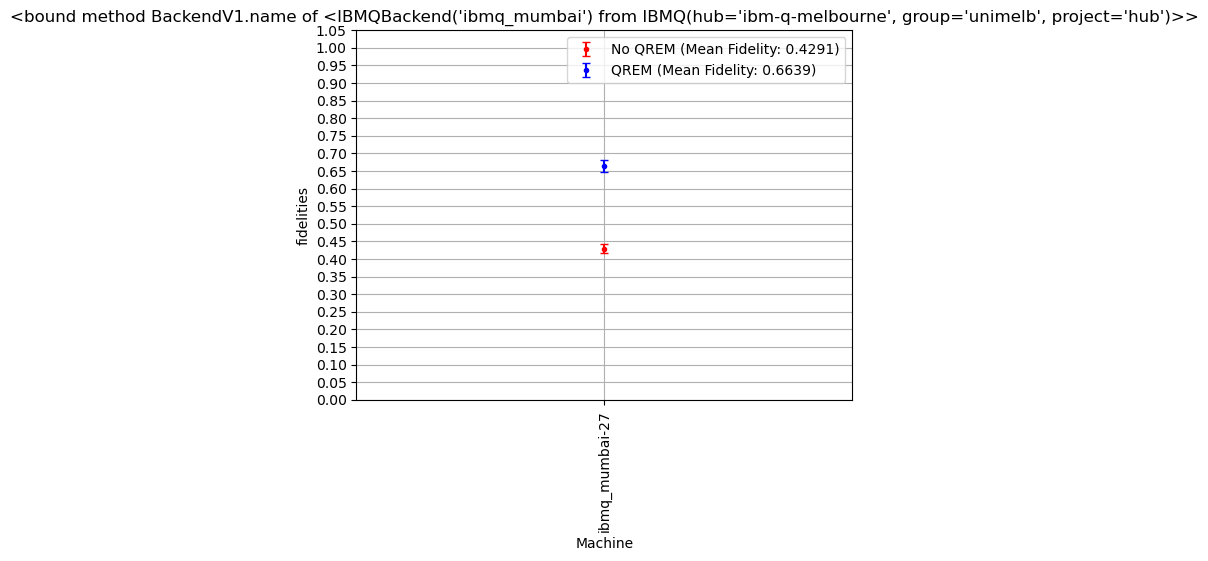

In [3]:
backend = provider.get_backend('ibmq_mumbai')
test = MomentMethod(backend, qubits_to_connect=list(range(len(backend.properties().qubits))))
test.circuit, test.initial_layout = test.gen_ghz_circuit(15)
test.Hamiltonian = test.gen_GHZ_Hamiltonian()
print(test.initial_layout)
print(test.circuit.depth())
print(test.to_string(test.Hamiltonian, index = 0))
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
test.gen_TPB_set()
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()

job_manager = IBMQJobManager()
#job_set = job_manager.retrieve_job_set('449c49a28a1a462298c0cbd5bbc8c86f-16801272828322842', provider)
job_set = job_manager.retrieve_job_set('e188601aa5a3415f8cbe2e0d1c2fd815-16808303709391775', provider)
results = job_set.results()
result = results.combine_results()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

test.reps = 4
test.shots = 8192

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
print('unmitigated moments done')
moments_dict_mit = test.moments_from_result(result, apply_mit = 'M3', order = 4)
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(4)-np.array(s_stars)
fidelities_mit = np.ones(4)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')
plot_fidelities(fidelities, backend, fidelities_mit)
# Unphysical fidelity could be due to that actual fidelity is low (0.265 from Witness of GHZ) so this method breaks down

Mumbai: 10-qubit GHZ state fidelity

[22, 25, 19, 24, 23, 16, 26, 14, 21, 20]
5
-0.1*IIIIIZIIZI-0.1*IIZIIZIIII-0.1*IIIIIIIZZI-0.1*IIIIIIZZII-0.1*IZZIIIIIII-0.1*IIIIIIIIZZ-0.1*ZZIIIIIIII-0.1*IIIIZIZIII-0.1*IIZZIIIIII-0.1*XXXXXXXXXX
Time elapsed: 0.01 s
131
386
Time elapsed: 58.73 s
unmitigated moments done
Moments: {1: [(-0.7446533203124999+0j), (-0.7394775390625+0j), (-0.7405029296875+0j), (-0.7392333984375+0j), (-0.746044921875+0j), (-0.7376220703125+0j), (-0.7343505859374999+0j), (-0.7372558593750002+0j)], 2: [(0.6334814453125002+0j), (0.6269824218750002+0j), (0.6288623046875002+0j), (0.6255712890624999+0j), (0.63337890625+0j), (0.6220068359375001+0j), (0.622265625+0j), (0.623427734375+0j)], 3: [(-0.5609809570312503+0j), (-0.5556953125000003+0j), (-0.5566694335937504+0j), (-0.5554482421875001+0j), (-0.5624003906250002+0j), (-0.5501645507812503+0j), (-0.5485703125000002+0j), (-0.5529404296874999+0j)], 4: [(0.5150089843749998+0j), (0.5095599609375+0j), (0.5106558593750002+0j), (0.5090535156250002+0j), (0.5154630859375+0j)

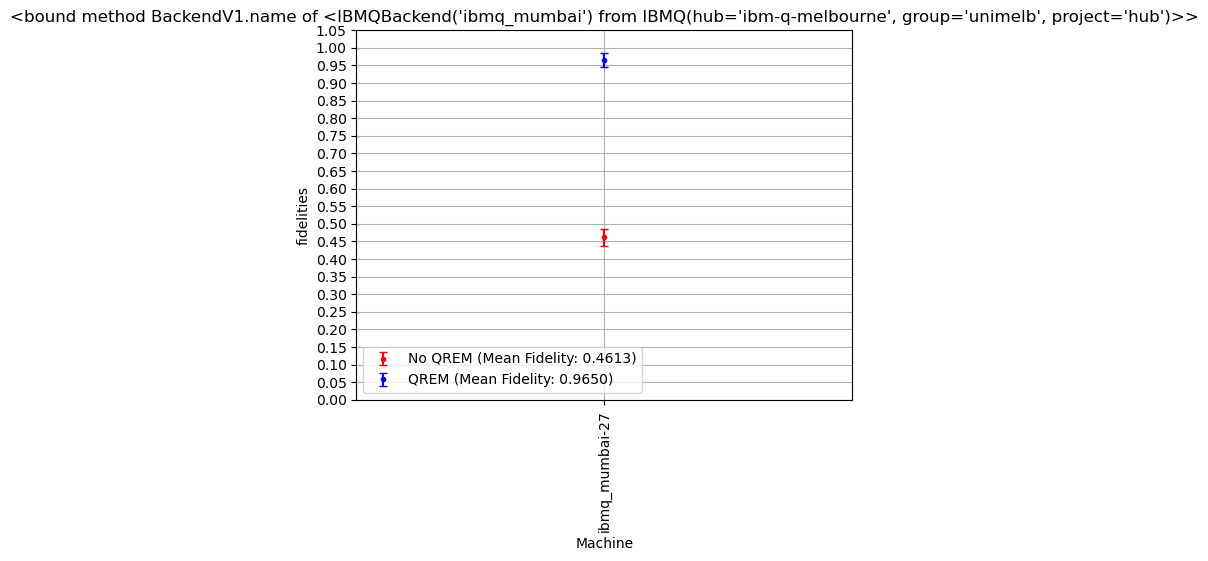

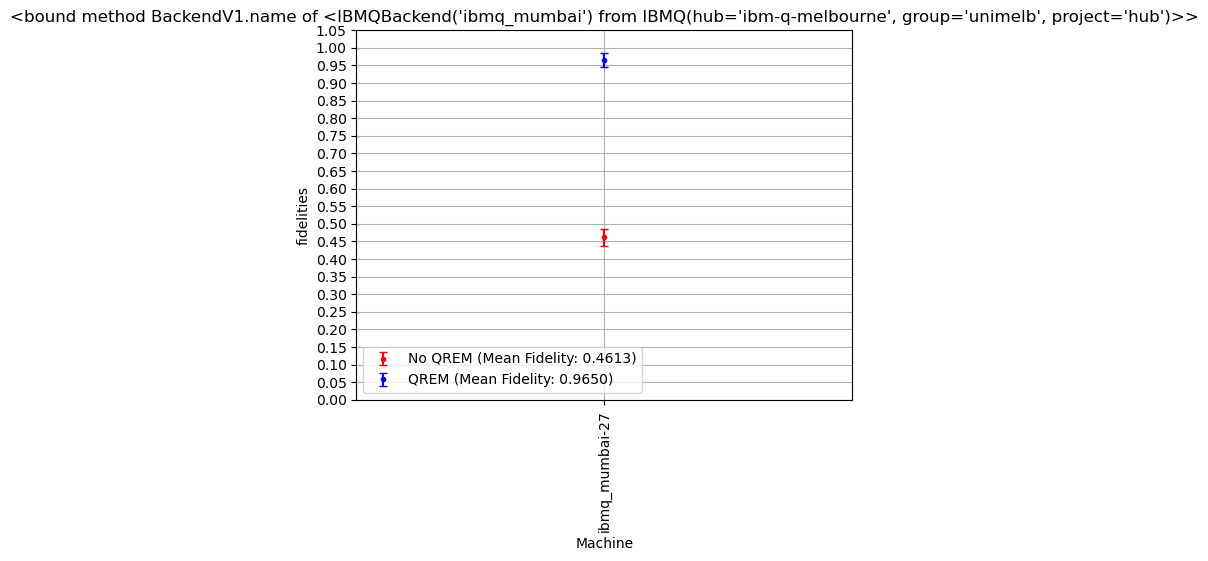

In [16]:
backend = provider.get_backend('ibmq_mumbai')
test = MomentMethod(backend, qubits_to_connect=list(range(len(backend.properties().qubits))))
test.circuit, test.initial_layout = test.gen_ghz_circuit(10)
test.Hamiltonian = test.gen_GHZ_Hamiltonian()
print(test.initial_layout)
print(test.circuit.depth())
print(test.to_string(test.Hamiltonian, index = 0))
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
test.gen_TPB_set()
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()

job_manager = IBMQJobManager()
#job_set = job_manager.retrieve_job_set('449c49a28a1a462298c0cbd5bbc8c86f-16801272828322842', provider)
#job_set = job_manager.retrieve_job_set('e188601aa5a3415f8cbe2e0d1c2fd815-16808303709391775', provider)
job_set = job_manager.retrieve_job_set('b837eb00b0fe4c9ab15b70a03387b9a3-16809369808484576', provider)
results = job_set.results()
result = results.combine_results()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
print('unmitigated moments done')
moments_dict_mit = test.moments_from_result(result, apply_mit = 'QREM', order = 4)
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')
plot_fidelities(fidelities, backend, fidelities_mit)
# Unphysical fidelity could be due to that actual fidelity is low (0.265 from Witness of GHZ) so this method breaks down

In [ ]:
pvecs_list = test.pvecs_from_result()
print(test.nqubits)
print(test.qubits_to_connect)

calibration = np.linalg.inv(test.calc_M_multi(test.qubits_to_connect))

Simulation/Test Block

In [8]:
backend = provider.get_backend('ibm_perth')
#test = Free_EntangleBase(backend, qubits_to_connect = [0,1,2,3,5])
#print(test.backend)
#print(test.device_name)
#print(test.nqubits)
#print(test.graph)
#print(test.connections)
#print(test.edge_params)
#print(test.edge_list)
#print(test.nedges)
test = MomentMethod(backend, qubits_to_connect=list(range(len(backend.properties().qubits))))
#test = MomentMethod(backend, qubits_to_connect=[0,1,4,7,10])
test.circuit.draw()
print(test.connections)

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
#print(test.to_string(test.Hamiltonian_powers, index = 0))
#print(test.to_string(test.Hamiltonian_powers, index = 1))
#print(test.to_string(test.Hamiltonian_powers, index = 2))
#print(test.to_string(test.Hamiltonian_powers, index = 3))
test.gen_TPB_set()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')
#print(test.TPB_sets)
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
#for group in test.TPB_sets:
#    for integer in group:
#        print(test.operator_to_string(integer))

job = test.run_moment_circuits(order=4, reps=1, shots=8192, qrem = True, sim='device')
print('job Done')

time3 = time()
result = job.result()
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

#print(result.get_counts('ZXZZZYXZXY-0'))
#test.moment_circuits['YIZYZ'].draw()
#time3 = time()
#counts_list = test.counts_from_result(job.result(), order = 4)
#print(counts_list[0])
#moments_dict = test.calc_moments_from_counts(counts_list)
#print(moments_dict)
#cummulants = test.cummulants_from_moments(moments_dict)
#print(cummulants)
#s_stars = test.s_star_from_cummulants(cummulants)
#fidelities = np.ones(1)-np.array(s_stars)
#print(f'Fidelities: {fidelities}')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
moments_dict_mit = test.moments_from_result(result, apply_mit = 'QREM', order = 4)
print(moments_dict)
print(moments_dict_mit)
cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(cummulants)
print(cummulants_mit)
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')
#test.moment_circuits['XZYYZ'].draw()
#print(test.operator_to_string((1,1)))
#print(test.to_string(test.Hamiltonian_powers, index = 0))
#print(test.TPB_sets)

#print(len(test.TPB_sets))
#total_basis = 0
#for i in test.TPB_sets:
#    total_basis += len(i) - 1
#print(total_basis)


{0: [1], 1: [0, 2, 3], 2: [1], 3: [1, 5], 4: [5], 5: [3, 4, 6], 6: [5]}
Time elapsed: 0.01 s
Time elapsed: 0.00 s
33
99
job Done
Time elapsed: 2.31 s
{1: [(-0.32484654017857134+0j)], 2: [(0.3349410076530612+0j)], 3: [(-0.23246742893586003+0j)], 4: [(0.2308950046855478+0j)]}
{1: [(-0.8941112264965693+0j)], 2: [(0.8881213779866413+0j)], 3: [(-0.8537329604660502+0j)], 4: [(0.8427909860713148+0j)]}
{1: [(-0.32484654017857134+0j)], 2: [(0.22941573298707302+0j)], 3: [(0.025386812810924503+0j)], 4: [(-0.050402990719572244+0j)]}
{1: [(-0.8941112264965693+0j)], 2: [(0.08868649263944184+0j)], 3: [(0.09893751149846944+0j)], 4: [(0.10854907079048279+0j)]}
Fidelities: [0.16953064+0.j]
Mitigated Fidelities: [0.93045872+0.j]
Time elapsed: 0.16 s


Job submission Block

In [4]:
backend = provider.get_backend('ibmq_manila')
#test = MomentMethod(backend, qubits_to_connect = list(range(len(backend.properties().qubits))))
#test = MomentMethod(backend, qubits_to_connect=[3,5,8,11,14,16])
test = MomentMethod(backend, qubits_to_connect=[0,1,2,3,4])
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
#print(test.to_string(test.Hamiltonian_powers, index = 0))
#print(test.to_string(test.Hamiltonian_powers, index = 1))
#print(test.to_string(test.Hamiltonian_powers, index = 2))
#print(test.to_string(test.Hamiltonian_powers, index = 3))
test.gen_TPB_set()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')
#print(test.TPB_sets)


#job = test.run_moment_circuits(order=4, reps=8, shots=4096, qrem = True, sim=None)
#print(job.job_id())
#print(test.to_string(test.Hamiltonian_powers, index = 0))
#print(test.TPB_sets)

print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
#print(test.TPB_sets)

Time elapsed: 0.01 s
Time elapsed: 0.00 s
16
31


In [2]:
from qiskit.converters import circuit_to_dag, dag_to_circuit
from collections import OrderedDict

def remove_idle_qwires(circ):
    dag = circuit_to_dag(circ)

    idle_wires = list(dag.idle_wires())
    for w in idle_wires:
        dag._remove_idle_wire(w)
        dag.qubits.remove(w)

    dag.qregs = OrderedDict()

    return dag_to_circuit(dag)

In [7]:
time0 = time()
#backend = provider.get_backend('ibm_brisbane')
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23,24])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23,24,25])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23,24,25,26])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,17,18,19,21,22,23,24,25,26])
#127 qubits GS
#test = MomentMethod(backend, qubits_to_connect = list(range(127)))
#100 qubits GS
#test = MomentMethod(backend, qubits_to_connect = list(range(100)))
#80 qubits GS
#test = MomentMethod(backend, qubits_to_connect = list(range(73))+[75,76,77,78,79,80,81])
#60 qubits GS
#test = MomentMethod(backend, qubits_to_connect = list(range(61)))
#40 qubits GS
#test = MomentMethod(backend, qubits_to_connect = list(range(40)))
#21 qubits GS
#test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,5,6,7,8,14,15,16,18,19,20,21,22,23,24,25,26])
#test = MomentMethod(backend, qubits_to_connect = [37,38,39,40,41,42,43,44,45,52,53,54,56,57,58,59,60,61,62,63])
#12 qubits GS
#test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,14,15,18,19,20,21,22])
#test = MomentMethod(backend, qubits_to_connect = [11,12,13,14,15,16,17,18,19,21,22,23,24,25,26])
test = MomentMethod(backend, qubits_to_connect = [10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26])
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'gen Hamiltonian powers time elapsed: {time1 - time0:.2f} s')
#print(test.to_string(test.Hamiltonian_powers, index = 0))
#print(test.to_string(test.Hamiltonian_powers, index = 1))
#print(test.to_string(test.Hamiltonian_powers, index = 2))
#print(test.to_string(test.Hamiltonian_powers, index = 3))
test.gen_TPB_set()
#print(test.TPB_sets)
total_basis = 0
print(len(test.TPB_sets))
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
time2 = time()
print(f'TPB sets Time elapsed: {time2 - time1:.2f} s')

gen Hamiltonian powers time elapsed: 0.09 s
268
2517
TPB sets Time elapsed: 0.08 s


In [3]:
moment_circuits = test.gen_measurement_circuits()

circ_list = []
for circ in moment_circuits.values():
    circ_list.append(circ)
circ_list_multi = []
for i in range(8):
    for circ in circ_list:
        name_ext = circ.name + f'-{i}'
        circ_list_multi.append(circ.copy(name_ext))
circ_list = circ_list_multi
#qrem_circuits = test.gen_qrem_circuits()
#circ_list.extend(qrem_circuits)


circ0 = QuantumCircuit(127, 127, name='qrem0')
circ0.measure(test.qubits_to_connect, test.qubits_to_connect)

circ1 = QuantumCircuit(127, 127, name='qrem1')
circ1.x(test.qubits_to_connect)
circ1.measure(test.qubits_to_connect, test.qubits_to_connect)
qrem_circuits = [circ0, circ1]
circ_list.extend(qrem_circuits)
print(len(circ_list))
#display(circ_list[-2].draw())
#for i in range(len(circ_list)):
#    circ_list[i] = remove_idle_qwires(circ_list[i])
#display(circ_list[-2].draw())

properties = test.backend.properties()
noise_model = NoiseModel.from_backend_properties(properties)
coupling_map = test.backend.configuration().coupling_map
basis_gates = noise_model.basis_gates

backend = Aer.get_backend('aer_simulator')
job = execute(circ_list, backend=backend,
              coupling_map=coupling_map,
              #initial_layout=[0,1,2,3,4,14,15,18,19,20,21,22],
              basis_gates=basis_gates,
              noise_model=noise_model,
              shots=10000)
result = job.result()

1386


In [4]:
counts_list = test.zipped_counts_from_result(result, order = 4)
test.gen_M_list(result)
counts_list_mit = test.apply_zipped_reduced_qrem(counts_list, mitigate_qubits = [0,2,20], threshold = 0.1) #latest calibration
moments_dict = test.calc_moments_from_zipped_counts(counts_list)
moments_dict_mit = test.calc_moments_from_zipped_counts(counts_list_mit)
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {energies}')
print(f'Mitigated Ground State energy: {energies_mit}')
#plot_fidelities(fidelities, backend, fidelities_mit)

2258
1728
1911
2021
2236
1796
2244
2218
2809
1997
2329
1827
2206
2065
2660
2138
2326
2018
1948
1998
2190
2048
2065
1929
1800
2086
1829
1779
2727
2752
1574
1913
2208
1926
1765
2601
1762
2202
2079
2546
1963
2130
1732
3152
1782
2374
1915
1983
2205
1906
2030
3034
2701
2062
1766
1912
1781
2311
1769
1676
2356
2584
1976
2058
1940
2058
1930
2300
1748
2195
1689
2161
2399
2256
1976
1914
2160
2133
2096
3573
2051
2489
2073
2083
2028
2261
2317
2555
2161
2552
1819
2603
2290
1834
1886
2134
2794
2217
2034
2806
2657
1673
1920
2230
1781
2360
2918
2902
2315
1895
2864
1873
2979
2313
2219
1731
2199
2279
2837
2198
2253
2241
1813
2257
2058
3220
1771
2285
2253
2127
2384
2501
2320
3515
2901
1922
3023
4005
1827
2743
1863
2176
3416
2800
2365
1981
1718
3628
2106
2463
1986
2352
2687
2470
2794
1993
2050
3525
2233
2816
1952
2721
3310
2562
2458
2552
2450
2529
2296
2534
2365
3591
2839
rep 0 done
2289
1777
1939
2018
2175
1787
2226
2158
2849
1966
2385
1905
2180
2052
2640
2125
2336
1998
1987
1975
2137
2077
2108
1952
1849

In [4]:
properties = test.backend.properties()
faulty_qubits = properties.faulty_qubits()
print(faulty_qubits)

[]


In [5]:
import csv

time3 = time()
moment_circuits = test.gen_measurement_circuits()
circ_list = []
for circ in moment_circuits.values():
    circ_list.append(circ)
circ_list_multi = []
for i in range(8):
    for circ in circ_list:
        name_ext = circ.name + f'-{i}'
        circ_list_multi.append(circ.copy(name_ext))
circ_list = circ_list_multi
qrem_circuits = test.gen_qrem_circuits()
circ_list.extend(qrem_circuits)
print(len(circ_list))
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

circ_list = transpile(circ_list, backend=test.backend)
#job1 = test.backend.run(circ_list[5800:5900], shots=10000)
#job2 = test.backend.run(circ_list[2300:2400], shots=10000)
#print(job1.job_id())
#print(job2.job_id())
jobs_id = []
jobs_id.append(['jobs','jobs_id'])

x = 0
for i in range(0, len(circ_list), 200):
    circs_to_run = circ_list[i:i+200]
    job = test.backend.run(circs_to_run, shots=10000)
    #job = execute(circs_to_run, backend=test.backend, shots=10000)
    jobs_id.append([f'{x}', job.job_id()])
    x += 1

with open('jobs_id_brisbane_moment_method_12q_8rep','w', newline='') as fp:
    writer = csv.writer(fp, delimiter='|')
    writer.writerows(jobs_id)

#job = test.backend.run(circ_list, shots=4096)
#print(job.job_id())
#job = test.run_moment_circuits(shots=4096, qrem=True, sim=None)
#options = Options()
#options.ExecutionOptions.shots = 10000
#options.max_execution_time = 14400 #check this later
#options.optimization_level = 1

#with Session(service=service, backend=backend) as session:
#    sampler = Sampler(session=session, options=options)
#    job = sampler.run(circ_list)
#    print(job.job_id())
#    time5 = time()
#    print(f'Job submission Time elapsed: {time5 - time4:.2f} s')
    #session.close()

1386
Time elapsed: 0.77 s


In [8]:
#from qiskit_ibm_provider.job import IBMCompositeJob
time3 = time()
moment_circuits = test.gen_measurement_circuits()
circ_list = []
for circ in moment_circuits.values():
    circ_list.append(circ)
circ_list_multi = []
for i in range(4):
    for circ in circ_list:
        name_ext = circ.name + f'-{i}'
        circ_list_multi.append(circ.copy(name_ext))
circ_list = circ_list_multi
print(len(circ_list))
qrem_circuits = test.gen_qrem_circuits()
circ_list.extend(qrem_circuits)
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

circ_list = transpile(circ_list, backend=backend)
#sub_lists = [circ_list[i:i+300] for i in range(0, len(circ_list), 300)]
#jobs = []
#for sub_list in sub_lists:
#    sub_job = test.backend.run(sub_list, shots=10000)
#    jobs.append(sub_job)
#job = IBMCompositeJob(test.backend, token, jobs=jobs, tags = [str(i+1) for i in range(len(jobs))])
job = test.backend.run(circ_list, shots=4096)
print(f'job id: {job.job_id()}')
#print(f'sub jobs: {job.sub_jobs()}')
#print(f'tags: {job.tags()}')
time5 = time()
print(f'Job submission Time elapsed: {time5 - time4:.2f} s')

1072
Time elapsed: 0.61 s
job id: cj76hgdtks61ugt0as8g
Job submission Time elapsed: 45.52 s


In [5]:
failed_job = backend.retrieve_job('644b76c31f9bd0671faa7c7e')
qobj = failed_job.qobj()
backend.run(qobj, job_name=failed_job.name(), job_tags=failed_job.tags())

C:\Users\k0426\AppData\Local\Temp\ipykernel_3544\3131089127.py:2: DeprecationWarning: The ``IBMQJob.qobj()`` method is deprecated and will be removed in a future release. You can now pass circuits to ``IBMQBackend.run()`` and use ``IBMQJob.circuits()``, ``IBMQJob.backend_options()``, and ``IBMQJob.header()`` to retrieve circuits, run configuration, and Qobj header, respectively.
  qobj = failed_job.qobj()
C:\Users\k0426\AppData\Local\Temp\ipykernel_3544\3131089127.py:3: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  backend.run(qobj, job_name=failed_job.name(), job_tags=failed_job.tags())


Dynmaical Decoupling on Moment method

In [12]:
#decay of fidelity using moment methods
import csv

time0 = time()
backend = provider.get_backend('ibmq_manila')
graphstate = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4])
graphstate.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'gen Hamiltonian powers time elapsed: {time1 - time0:.2f} s')

graphstate.gen_TPB_set()
total_basis = 0
print(len(graphstate.TPB_sets))
for i in graphstate.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
time2 = time()

delays_ns = list(range(0,5000,500))
delays = graphstate.format_delays(delays_ns, unit='ns')
increment = delays[1]-delays[0]

jobs_id = []
jobs_id.append(['jobs','jobs_id'])
#free delay
for t in delays:
    graphstate.gen_delay_circuit(t, increment, dynamic_decoupling=False) #, pulses=4)
    
    job1 = graphstate.run_moment_circuits(order=4, reps=4, shots=8192, qrem=True, sim = None)
    jobs_id.append([f'free_delay-{t}', job1.job_id()])

# double pulse
for t in delays:
    graphstate.gen_delay_circuit(t, increment, dynamic_decoupling='double_pulse') #, pulses=4)
    
    job1 = graphstate.run_moment_circuits(order=4, reps=4, shots=8192, qrem=True, sim = None)
    jobs_id.append([f'double_pulse-{t}', job1.job_id()])

#pdd activated
for t in delays:
    graphstate.gen_delay_circuit(t, increment, dynamic_decoupling='pdd') #, pulses=4)
    
    job1 = graphstate.run_moment_circuits(order=4, reps=4, shots=8192, qrem=True, sim = None)
    jobs_id.append([f'pdd-{t}', job1.job_id()])

fp = open('jobs_id_manila_5000ns_MomentMethod','w', newline = '')
writer = csv.writer(fp, delimiter='|')
writer.writerows(jobs_id)
fp.close()

gen Hamiltonian powers time elapsed: 0.00 s
16
31


In [2]:
def plot_fidelities(n_array, backend, nmit_array=None, figsize=(6.4, 4.8)):
    """
    Plot average negativity across multiple experiments with error bars as std

    """

    # Figure
    fig, ax = plt.subplots(figsize=figsize)

    # Extract the mean negativity and its standard deviation
    machine = [f'{backend.name()}-{len(backend.properties().qubits)}']
    
    n_array = np.real(n_array)
    nmit_array = np.real(nmit_array)

    n_mean = np.mean(n_array)
    n_std = np.std(n_array)/np.sqrt(len(n_array))
        
    # Convert into array for plotting
    X = np.array(machine)
    Y0 = np.array(n_mean)
    Y0err = np.array(n_std)
    
    try:
        nmit_mean = np.mean(nmit_array)
        nmit_std = np.std(nmit_array)/np.sqrt(len(nmit_array))

        Y1 = np.array(nmit_mean)
        Y1err = np.array(nmit_std)
        # Order in increasing minimum negativity (QREM)
        #Y1min = Y1 - Y1err
        #idx = Y1min.argsort()#find the indicies that sort Y1min from smallest to largest
        #Y1 = Y1[idx]#then put all negativities in such order (indicies)
        #Y1err = Y1err[idx]
    except:
        # Order in increasing minimum negativity (No QREM)
        Y0min = Y0 - Y0err
        idx = Y0min.argsort()

    
    # Plot
    ax.errorbar(X, Y0, yerr=Y0err, capsize=3, fmt='.', c='r', label=f'No QREM (Mean Fidelity: {np.mean(Y0):.4f})')
    
    try:
        ax.errorbar(X, Y1, yerr=Y1err, capsize=3, fmt='.', c='b', 
                    label=f'QREM (Mean Fidelity: {np.mean(Y1):.4f})')
    except:
        pass
    
    # Fig params
    ax.set_yticks(np.arange(0, 1.1, 0.05))
    ax.tick_params(axis='x', labelrotation=90)
    ax.grid()
    ax.legend()

    ax.set_xlabel("Machine")
    ax.set_ylabel("fidelities")
    #ax.set_title(f"Native-graph state negativities ({backend.name()})")
    ax.set_title(backend.name)

    return fig

In [7]:
time1 = time()
with open('mumbai_class_data.pkl', 'rb') as inp:
    test = pickle.load(inp)
with open('mumbai_counts.pkl', 'rb') as inp:
    counts_list = pickle.load(inp)
with open('mumbai_counts_mit.pkl', 'rb') as inp:
    counts_list_mit = pickle.load(inp)
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

moments_dict = test.calc_moments_from_counts(counts_list)
time3 = time()
print(f'Moments: {moments_dict}')
print(f'Time elapsed: {time3 - time2:.2f} s')

moments_dict_mit = test.calc_moments_from_counts(counts_list_mit)
print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')
#plot_fidelities(fidelities, backend, fidelities_mit)

Time elapsed: 5.63 s
Moments: {1: [(-0.7625506365740738+0j)], 2: [(0.6096100983796294+0j)], 3: [(-0.5053985801913451+0j)], 4: [(0.43015989082337064+0j)]}
Time elapsed: 171.51 s
Mitigated Moments: {1: [(-0.7769885596303298+0j)], 2: [(0.6325633451682899+0j)], 3: [(-0.5321757730998952+0j)], 4: [(0.45676731400017656+0j)]}
Time elapsed: 236.17 s
Cummulants: {1: [(-0.7625506365740738+0j)], 2: [(0.028126625040104214+0j)], 3: [(0.0023559400480486145+0j)], 4: [(-0.0012813714484178366+0j)]}
Mitigated Cummulants: {1: [(-0.7769885596303298+0j)], 2: [(0.028852123371875482+0j)], 3: [(0.0041542488993377286+0j)], 4: [(-0.0017961488309065163+0j)]}
Fidelities: [0.59880749+0.j]
Mitigated Fidelities: [0.76817748+0.j]
Ground State energy: (-0.8969127914611152+0j)
Mitigated Ground State energy: (-0.8771566920695765+0j)
Time elapsed: 0.01 s


NameError: name 'backend' is not defined

GraphState Results: Mumbai

499
20854
Time elapsed: 1.99 s
Time elapsed: 214.94 s
XZZXXZXZXZXZZXZZZZXYYZZZXZX done
XZZXXZXZZXZZXZXZZXZZXXXZXZX done
YYZXZZXZXZZZXZZZXXZZXZZXZXZ done
XZZXXZXZZXZYXZYZZXZXZZZXZZX done
XZYYYZZYXZZZXZXZZXZZXXXZXZX done
ZXZXZZXZZXXXZXZXYXZYZXZZXZX done
YYZXZZYXYZYYZXZZZZYXZYZZXZX done
XZXZXXXZZXXXZXZXXXZZXXZZZXZ done
ZXZXZZZXYYZZZXZXZXZYYXZZXZX done
XZXZYXZYZXZXZXZXZXZXZXZZXZX done
ZXZXZZXZXZZZXZXZZZXZXZXXZZX done
YYZZZXZXZXZZZZXXZXZXZZZYXXY done
ZXZXZZZXXZZZZXZXXXZZXZZXZXZ done
ZYYZZZXZYYXZZZXZZZXYZZYYYZX done
XZXZXXXZZXXXZXZXZXZXZXZZXZX done
XZXZZZZYYZYXZZYXZXZXYXYZXZX done
YYZYZYXZZXZXYYZZXZXZXZXXZZX done
XZZXXZXZXZZZYYZZXXZZXXZZZXZ done
XZZXZZZXZXZXXZZZXZXZXZYXZYZ done
XZZYXYXZZXZZYZXYZXZYYXZZXZX done
XZYXYYZYZXZXZXZXXXZZXXXZXZX done
XZXZXZXZXZXZZZXZZZXZXZXXZZX done
XZXZXZXZYZXYZXZYXZYZXZXYYZX done
XZXZZXYYZXZXXZZZXXZZXXZZZXZ done
ZYZYYYXZZXZZXZXZZZXXZZZXZXZ done
XZXZXXXZZXZZYZXYZXZZXXYZYXZ done
YYZXZZZYZXYXZXZXXXZZXXZZYYZ done
ZXZXZZZXYZZYXZZZXZXZXZZXZXZ done
XZXZXXXZZXZXXZZZZZXXZZ

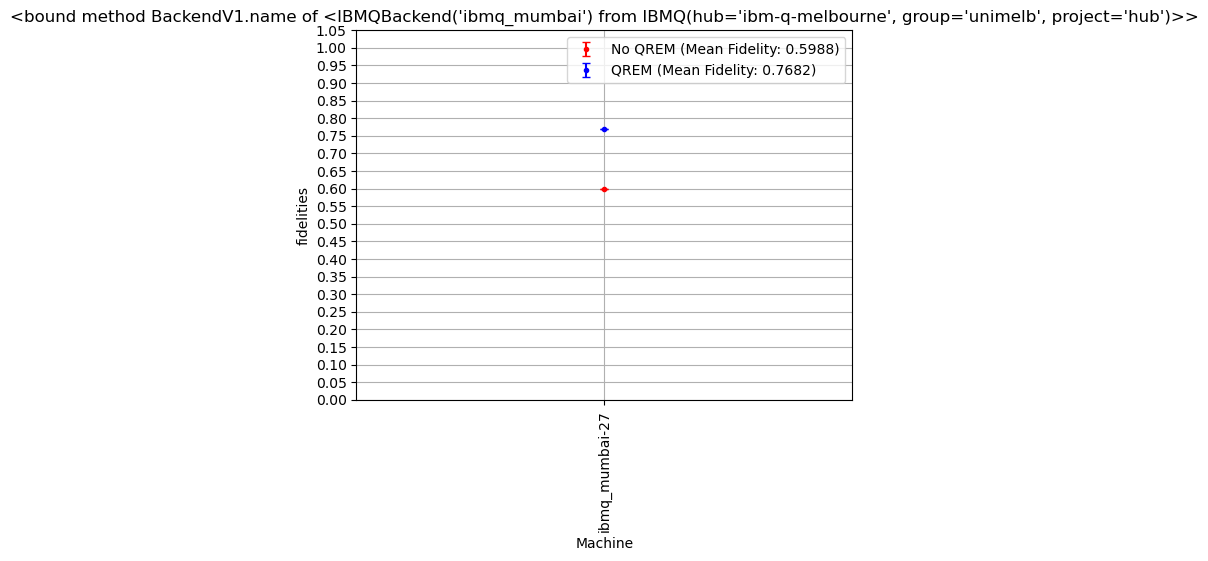

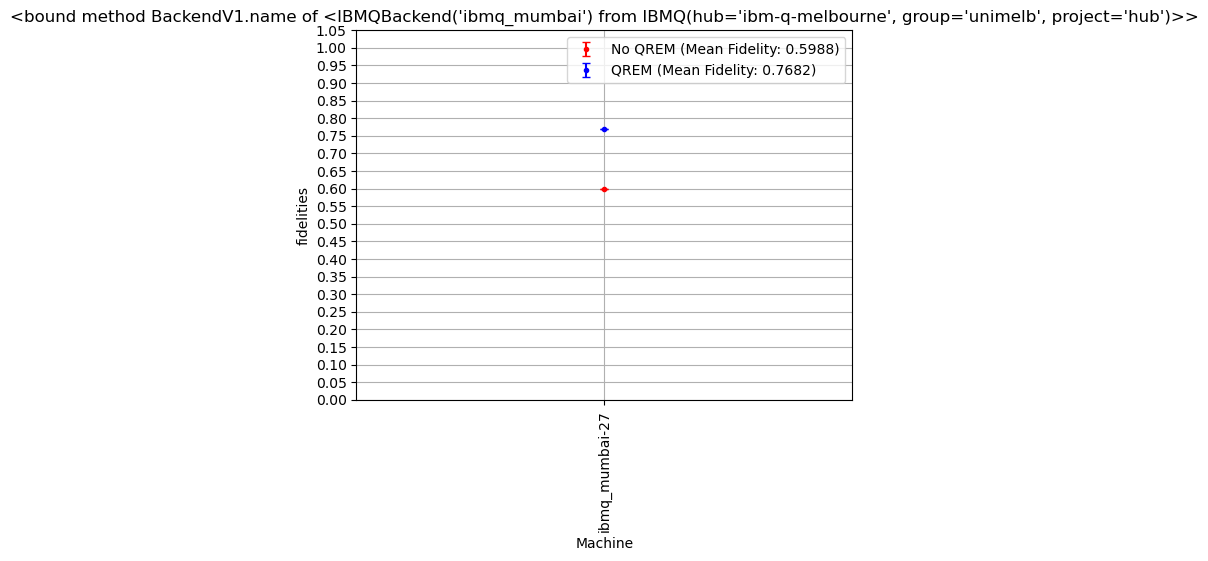

In [4]:
backend = provider.get_backend('ibmq_mumbai')
test = MomentMethod(backend, qubits_to_connect = list(range(len(backend.properties().qubits))))

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')

job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('e44a6caba63d402da16d5190d83bbca4-16800950968310907', provider)
results = job_set.results()
result = results.combine_results()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
print('unmitigated moments done')
moments_dict_mit = test.moments_from_result(result, apply_mit = 'M3', order = 4)
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')
plot_fidelities(fidelities, backend, fidelities_mit)

GraphState Result: Washington

Time elapsed: 324.44 s
1243
10676129
Time elapsed: 380.05 s
Time elapsed: 605.66 s
Moments: {1: [(-0.6151882381889765+0j)], 2: [(0.3842642958723411+0j)], 3: [(-0.24442467956356115+0j)], 4: [(0.15797665632825694+0j)]}
Time elapsed: 95839.28 s
Cummulants: {1: [(-0.6151882381889765+0j)], 2: [(0.005807727466284218+0j)], 3: [(-0.0008841131311977859+0j)], 4: [(-0.000717326577329756+0j)]}
Fidelities: [0.94969454+0.j]
Ground State energy: (-0.643491360562111+0j)
Time elapsed: 0.06 s


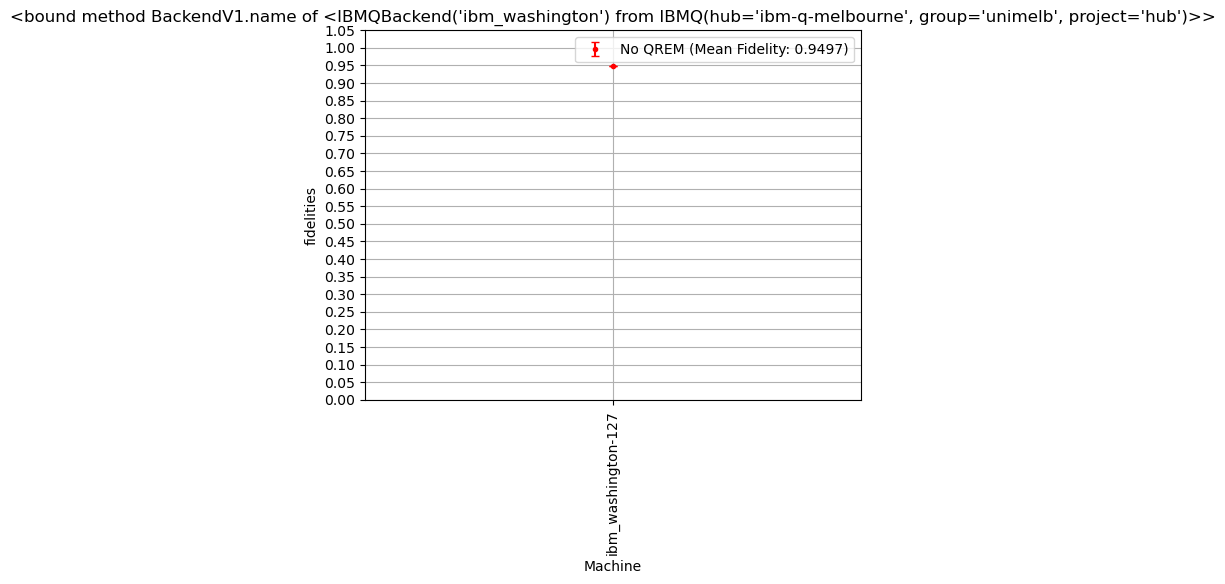

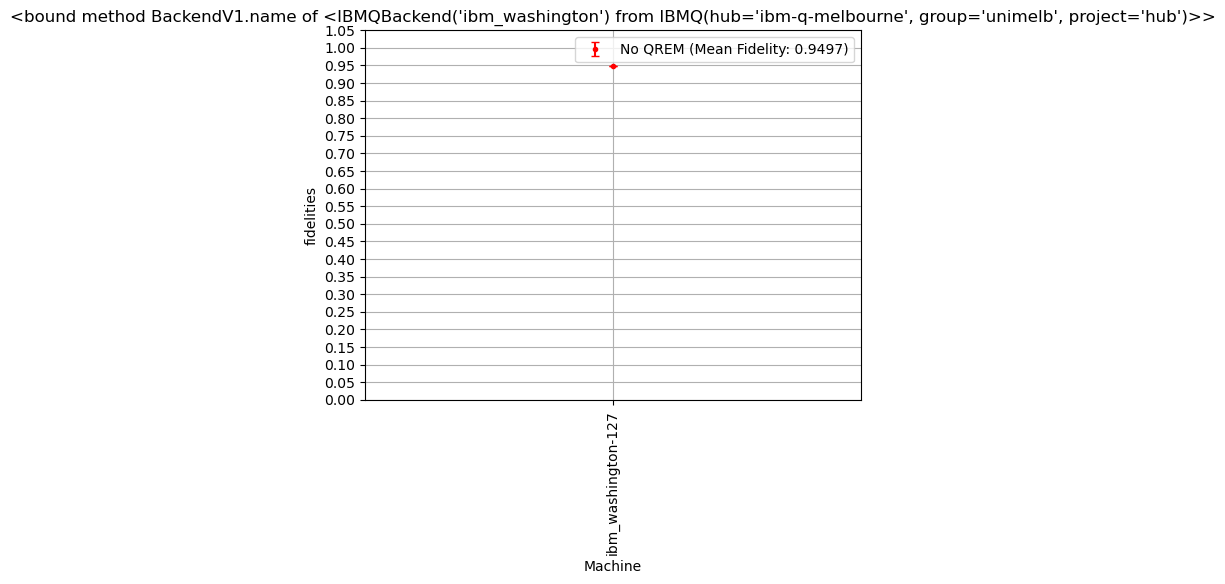

In [3]:
#Full GS on 127 qubits
backend = provider.get_backend('ibm_washington')
test = MomentMethod(backend, qubits_to_connect = list(range(len(backend.properties().qubits))))

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('7dac99d84ab04cb79a8783dbcce6c5cc-16796241607522767', provider)
results = job_set.results()
result = results.combine_results()
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
#moments_dict = test.moments_from_result(result, apply_mit = 'M3', order = 4)
print(f'Moments: {moments_dict}')
#print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
#cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
#print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
#s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
#fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
#print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
#energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
#print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')
plot_fidelities(fidelities, backend)#, fidelities_mit)

Graph State Result: brisbane (80 qubits)- test on small jobs

In [2]:
import csv

#test = MomentMethod(backend, qubits_to_connect = list(range(127)))
#test = MomentMethod(backend, qubits_to_connect = list(range(20)))
#test = MomentMethod(backend, qubits_to_connect = list(range(73))+[75,76,77,78,79,80,81])
#test = MomentMethod(backend, qubits_to_connect = list(range(61)))
#test = MomentMethod(backend, qubits_to_connect = list(range(40)))
#test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,5,6,7,8,14,15,16,18,19,20,21,22,23,24,25])
test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,14,15,18,19,20,21,22])
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

#with open('brisbane_127q_class_data.pkl', 'wb') as outp:
#    pickle.dump(test, outp, pickle.HIGHEST_PROTOCOL)

jobs_id = {}
fp = open('jobs_id_brisbane_moment_method_12q_8rep','r')
reader = csv.reader(fp, delimiter='|')
line_count = 0
for row in reader:
    if line_count > 0:
        print(row)
        jobs_id[int(row[0])] = row[1]
    line_count += 1
fp.close()
print(jobs_id)

Time elapsed: 0.02 s
173
794
Time elapsed: 0.11 s
['0', 'cioud6dlipn2bcalmjj0']
['1', 'cioud6rc2439q33u3280']
['2', 'cioud7jc2439q33u32vg']
['3', 'cioud86uepl821f2jmtg']
['4', 'cioud8uuepl821f2jnl0']
['5', 'cioud9muepl821f2jo7g']
['6', 'ciouda4t4v68ftbnda8g']
{0: 'cioud6dlipn2bcalmjj0', 1: 'cioud6rc2439q33u3280', 2: 'cioud7jc2439q33u32vg', 3: 'cioud86uepl821f2jmtg', 4: 'cioud8uuepl821f2jnl0', 5: 'cioud9muepl821f2jo7g', 6: 'ciouda4t4v68ftbnda8g'}


In [ ]:
from datetime import datetime

t = datetime(day=9, month=7, year=2023, hour=12)
data = backend.properties(datetime=t).qubits
calibrations = {}
for i in range(len(data)):
    calibrations[i] = data[i][4].value
print(calibrations)
{k:v for k, v in sorted(calibrations.items(), key=lambda item: item[1])}

In [ ]:
test.moment_circuits = None
test.TPB_sets = None
test.reps = 8
test.shots = 10000
counts_list = test.zipped_counts_from_result(jobs_id, start = 0, end = 8)
#with open('brisbane_127q_counts_2_4.pkl', 'wb') as outp:
#    pickle.dump(counts_list, outp, pickle.HIGHEST_PROTOCOL)
#del counts_list

#test.moment_circuits = None
#test.TPB_sets = None
#with open('brisbane_127q_counts_2_4.pkl', 'rb') as inp:
#    counts_list = pickle.load(inp)

#test.reps = 1
#test.shots = 10000
test.gen_M_list(provider.backend.retrieve_job(jobs_id[6]).result())

#counts_list = [counts_list[1]]
counts_list_mit = test.apply_zipped_reduced_qrem(counts_list, mitigate_qubits = [0,2,20], 
                                                 threshold = 0.1)
#del counts_list
#with open('brisbane_127q_counts_mit_1_8.pkl', 'wb') as outp:
#    pickle.dump(counts_list_mit, outp, pickle.HIGHEST_PROTOCOL)
#del counts_list_mit

In [5]:
with open('brisbane_127q_counts_mit_1_7.pkl', 'rb') as inp:
    counts_list1 = pickle.load(inp)
with open('brisbane_127q_counts_mit_1_8.pkl', 'rb') as inp:
    counts_list2 = pickle.load(inp)

counts_list_mit = []
counts_list_mit.append(counts_list1[0])
del counts_list1
counts_list_mit.append(counts_list2[0])
del counts_list2
with open('brisbane_127q_counts_mit_2_4.pkl', 'wb') as outp:
    pickle.dump(counts_list_mit, outp, pickle.HIGHEST_PROTOCOL)
del counts_list_mit

In [ ]:
test = MomentMethod(backend, qubits_to_connect = list(range(100)))
#test = MomentMethod(backend, qubits_to_connect = list(range(73))+[75,76,77,78,79,80,81])
#test = MomentMethod(backend, qubits_to_connect = list(range(61)))
#test = MomentMethod(backend, qubits_to_connect = list(range(40)))
#test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,5,6,7,8,14,15,16,18,19,20,21,22,23,24,25])
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')
#with open('brisbane_80q_class_data.pkl', 'rb') as inp:
#    test = pickle.load(inp)
with open('brisbane_100q_counts_8.pkl', 'rb') as inp:
    counts_list = pickle.load(inp)
counts_list = counts_list[4:]
#with open('brisbane_40q_counts_mit_4_2.pkl', 'rb') as inp:
#    counts_list_mit = pickle.load(inp)
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

test.reps = 4
test.shots = 10000
moments_dict = test.calc_moments_from_zipped_counts(counts_list)
#moments_dict_mit = test.calc_moments_from_zipped_counts(counts_list_mit)
print(f'Moments: {moments_dict}')
#print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
#cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
#print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
#s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
#fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
#print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
#energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {energies}')
#print(f'Mitigated Ground State energy: {energies_mit}')
#plot_fidelities(fidelities, backend, fidelities_mit)

Time elapsed: 115.55 s
1139
4087976
Time elapsed: 160.55 s
Time elapsed: 34.79 s
rep0 done
rep1 done
rep2 done
rep3 done
Moments: {1: [(-0.776122+0j), (-0.7805600000000001+0j), (-0.771096+0j), (-0.7805219999999998+0j)], 2: [(0.6083138400000011+0j), (0.6127868799999979+0j), (0.601850880000001+0j), (0.6165764799999996+0j)], 3: [(-0.4833310035999968+0j), (-0.4845669607999947+0j), (-0.4750459391999972+0j), (-0.4935688752000034+0j)], 4: [(0.3914672638560283+0j), (0.3874751139519848+0j), (0.37746179294403814+0j), (0.399196847440038+0j)]}
Time elapsed: 197317.49 s
Cummulants: {1: [(-0.776122+0j), (-0.7805600000000001+0j), (-0.771096+0j), (-0.7805219999999998+0j)], 2: [(0.005948481116001103+0j), (0.0035129663999976524+0j), (0.007261838784000996+0j), (0.007361887515999865+0j)], 3: [(-0.0019717553500899505+0j), (-0.0007658716408318464+0j), (0.00023801664245962952+0j), (-0.0008251375419173167+0j)], 4: [(0.0008968403929977007+0j), (0.000990001566639634+0j), (-0.0014052617342281714+0j), (-0.0015941

In [7]:
cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {energies}')
print(f'Mitigated Ground State energy: {energies_mit}')

Cummulants: {1: [(-0.7582700000000001+0j), (-0.7469000000000001+0j), (-0.7467+0j), (-0.7595000000000001+0j), (-0.7590499999999999+0j), (-0.7669400000000001+0j), (-0.7595499999999998+0j), (-0.7731700000000001+0j)], 2: [(0.033730607099999976+0j), (0.036993390000000126+0j), (0.03757310999999952+0j), (0.03775074999999972+0j), (0.037247097500000215+0j), (0.03626903640000023+0j), (0.03574179750000017+0j), (0.0343971510999993+0j)], 3: [(0.002568596971433107+0j), (0.004731131681999609+0j), (-0.0011766097260006367+0j), (0.004774053749999549+0j), (0.006121624914749997+0j), (0.0057915035932329245+0j), (0.0026494984822503093+0j), (0.0012755097619724376+0j)], 4: [(-0.003102713660008794+0j), (-0.001677506875154446+0j), (-0.014432639682431764+0j), (-0.0011667685103755703+0j), (0.0025485385149523893+0j), (-0.0018877564283054527+0j), (0.0034920808108127336+0j), (-0.0058317624097792686+0j)]}
Mitigated Cummulants: {1: [(-0.7642383088847725+0j), (-0.7509755661540783+0j), (-0.7510190100175091+0j), (-0.7663

In [55]:
def s_star_from_cummulants(C):

    s_star_list = []
    for i in range(2):
        delta = (3*(C[3][i]**2))-(2*C[2][i]*C[4][i])
        sqrt = np.sqrt(delta)
                
        s_star = (C[2][i]**3*(delta-C[3][i]*sqrt))/(delta*(C[3][i]**2-C[2][i]*C[4][i]))
        s_star_list.append(s_star)
            
    return s_star_list

def ratio(C):
    ground_state_energies_list = []
    for i in range(8):
        X = 3*C[3][i]**2-2*C[2][i]*C[4][i]
        sqrt = np.sqrt(X)
        E0 = C[1][i]-C[2][i]**2/(C[3][i]**2-C[2][i]*C[4][i])*(sqrt-C[3][i])
        C1E0=C[1][i]/E0
        ground_state_energies_list.append(C1E0)
    return ground_state_energies_list
        
def energy_from_cummualnts(C):
    ground_state_energies_list = []
    for i in range(8):
        X = 3*C[3][i]**2-2*C[2][i]*C[4][i]
        sqrt = np.sqrt(X)
        E0 = C[1][i]-C[2][i]**2/(C[3][i]**2-C[2][i]*C[4][i])*(sqrt-C[3][i])
        ground_state_energies_list.append(E0)
    return ground_state_energies_list

cummulants = {1: [(-0.7668175+0j), (-0.7749250000000004+0j), (-0.7522550000000001+0j), (-0.7624275000000003+0j), (-0.7470325+0j), (-0.7500175+0j), (-0.7476849999999998+0j), (-0.7579825000000002+0j)], 2: [(0.009265359193752043+0j), (0.009022556874998755+0j), (0.014624539974997575+0j), (0.010461369743750115+0j), (0.01016650644375039+0j), (0.010825937193748914+0j), (0.01036545327499827+0j), (0.009674092193748818+0j)], 3: [(-0.0008304595627350812+0j), (0.0005018949242738668+0j), (-0.006132323832842186+0j), (0.000334476604827251+0j), (-0.00021527173683168893+0j), (-0.001944288669537185+0j), (0.00034690342664794004+0j), (-0.0005053843110938826+0j)], 4: [(0.00015939190125639898+0j), (-0.0005715237128741974+0j), (-0.008343629612473005+0j), (0.0001712139714419562+0j), (0.001796414399086517+0j), (-0.000741363712176442+0j), (0.002961611671321797+0j), (-0.001647590535135637+0j)]}
ratios = ratio(cummulants)
energies = energy_from_cummualnts(cummulants)
print(ratios)
print(energies)

[(1.108425662743985+0.1681315582538183j), (0.9479816632372594-0j), (0.9573326386880031-0j), (0.9508833241589187+0.14238454749492524j), (0.9995327849384914+0.045868323230444735j), (0.913235755915035-0j), (0.9970327991206424+0.03654617514248614j), (0.9547319507381902-0j)]
[(-0.6762484273093192+0.10257674977385561j), (-0.8174472461352381+0j), (-0.7857822554038729+0j), (-0.7842259396838709+0.11742939719175133j), (-0.7458111064445209+0.03422509537929568j), (-0.8212747859926978+0j), (-0.7489039183436826+0.027451026474577j), (-0.7939217907329225+0j)]


In [56]:
a = [(0.9479816632372594-0j), (0.9573326386880031-0j), (0.913235755915035-0j), (0.9547319507381902-0j)]

print(np.mean(np.array(a)))
print(np.std(np.array(a))/len(a))

(0.9433205021446219+0j)
0.004425387532366815


Graph State Result: Washington (80 qubits)

In [ ]:
#GS on 80 qubits
test = MomentMethod(backend, qubits_to_connect = list(range(73))+[75,76,77,78,79,80,81])

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

with open('washington_60q_class_data.pkl', 'wb') as outp:
    pickle.dump(test, outp, pickle.HIGHEST_PROTOCOL)
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

# transpiled and run using provide.backend.run
#job = provider.backend.retrieve_job('chit2sc6f7i49rvkrop0')
# run directly using execute
#job = provider.backend.retrieve_job('chitj5j7ca17j335vrn0')
#print('job retrieved')
#result = job.result()
#print('result get')

#retrieve runtime sampler job
job = service.job('')
result = job.result()

time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

with open('washington_60q_result.pkl', 'wb') as outp:
    pickle.dump(result, outp, pickle.HIGHEST_PROTOCOL)
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')

Graph State Result: Washington (60 qubits)

In [2]:
#GS on 60 qubits
backend = provider.backend.ibm_washington
test = MomentMethod(backend, qubits_to_connect = list(range(61)))

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

with open('washington_60q_class_data.pkl', 'wb') as outp:
    pickle.dump(test, outp, pickle.HIGHEST_PROTOCOL)
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('eedd93c53c0848eba03d56d9747eae65-16834203740460463', provider)
print('job set retrieved')
results = job_set.results()
del job_set
print('results get')
result = results.combine_results()
del results
print('results combined')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

with open('washington_60q_result.pkl', 'wb') as outp:
    pickle.dump(result, outp, pickle.HIGHEST_PROTOCOL)
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')

Time elapsed: 14.93 s
879
559737
Time elapsed: 24.82 s


C:\Users\k0426\AppData\Local\Temp\ipykernel_19824\361078610.py:20: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  pickle.dump(test, outp, pickle.HIGHEST_PROTOCOL)


Time elapsed: 5.31 s
job set retrieved
results get
results combined
Time elapsed: 3041.06 s
Time elapsed: 395.03 s


In [3]:
time1 = time()
with open('washington_60q_class_data.pkl', 'rb') as inp:
    test = pickle.load(inp)
test.moment_circuits = None
test.TPB_sets = None
test.reps = 8
test.shots = 10000
with open('washington_60q_result.pkl', 'rb') as inp:
    result = pickle.load(inp)
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

test.gen_M_list(result)
del result
with open('washington_60q_counts.pkl', 'rb') as inp:
    counts_list = pickle.load(inp)

print('counts_list get')
print(len(counts_list))
#counts_list = test.zipped_counts_from_result(result, order = 4)
#with open('washington_60q_counts.pkl', 'wb') as outp:
#    pickle.dump(counts_list, outp, pickle.HIGHEST_PROTOCOL)
time3 = time()
#print(f'Time elapsed: {time3 - time2:.2f} s')

test.reps = 2
counts_list_mit = test.apply_zipped_reduced_qrem(counts_list[4:6], mitigate_qubits = [4,9,12], threshold = 0.1)
del counts_list
with open('washington_60q_counts_mit3.pkl', 'wb') as outp:
    pickle.dump(counts_list_mit, outp, pickle.HIGHEST_PROTOCOL)
del counts_list_mit
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

Time elapsed: 62.03 s


In [2]:
time1 = time()
with open('washington_60q_class_data.pkl', 'rb') as inp:
    test = pickle.load(inp)
with open('washington_60q_counts.pkl', 'rb') as inp:
    counts_list = pickle.load(inp)
#with open('washington_60q_counts_mit1.pkl', 'rb') as inp:
#    counts_list_mit = pickle.load(inp)
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')
test.reps = 8
test.shots = 10000
moments_dict = test.calc_moments_from_zipped_counts(counts_list)
#moments_dict_mit = test.calc_moments_from_zipped_counts(counts_list_mit)
print(f'Moments: {moments_dict}')
#print(f'Mitigated Moments: {moments_dict_mit}')
time3 = time()
#print(f'expected vals time: {time4 - time3:.2f} s')
print(f'Time elapsed: {time3 - time2:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
#cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
#print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
#s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
#fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
#print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
#energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {energies}')
#print(f'Mitigated Ground State energy: {energies_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')
#plot_fidelities(fidelities, backend, fidelities_mit)


Time elapsed: 20.32 s
rep0 done
rep1 done
rep2 done
rep3 done
rep4 done
rep5 done
rep6 done
rep7 done
Moments: {1: [(-0.6887967213114754+0j), (-0.6848622950819675+0j), (-0.681177049180328+0j), (-0.6862852459016393+0j), (-0.697154098360656+0j), (-0.7122262295081967+0j), (-0.6913114754098362+0j), (-0.6875606557377049+0j)], 2: [(0.4869445847890351+0j), (0.4824843859177642+0j), (0.47822811072292404+0j), (0.48340005374899214+0j), (0.4988799785004034+0j), (0.5206175759204513+0j), (0.4887203439935508+0j), (0.4865176027949478+0j)], 3: [(-0.3536025702591848+0j), (-0.351053303139909+0j), (-0.34212855613465226+0j), (-0.3503373577524092+0j), (-0.36501270150365256+0j), (-0.3882353492142513+0j), (-0.35456006449879207+0j), (-0.35293298910481463+0j)], 4: [(0.2618066254552603+0j), (0.26119860732186795+0j), (0.24701411787121647+0j), (0.2622534963387214+0j), (0.2699288169494352+0j), (0.29022142045398047+0j), (0.2632632861232512+0j), (0.264050866855972+0j)]}
Time elapsed: 41415.18 s
Cummulants: {1: [(-0.6

In [5]:
print(np.mean(fidelities))
print(np.std(fidelities)/np.sqrt(len(fidelities)))
print(np.mean(energies))
print(np.std(energies)/np.sqrt(len(energies)))

(0.9252684880390178+0j)
0.009258129810653028
(-0.736253934556244+0j)
0.002497965891648013


In [3]:
def s_star(C2,C3,C4):
    delta = (3*(C3**2))-(2*C2*C4)
    sqrt = np.sqrt(delta)
    return (C2**3*(delta-C3*sqrt))/(delta*(C3**2-C2*C4))

def delta(C2,C3,C4):
    return (3*(C3**2))-(2*C2*C4)

def E(C1,C2,C3,C4):
    X = 3*C3**2-2*C2*C4
    sqrt = np.sqrt(X)
    E0 = C1-C2**2/(C3**2-C2*C4)*(sqrt-C3)
    return E0
c1 = np.array([(-0.6992531526091879+0j), (-0.6942635607109786+0j), (-0.689348660821535+0j), (-0.6992258268543367+0j), (-0.7185524506907511+0j), (-0.722747486701916+0j), (-0.7019415516806748+0j), (-0.69891588143126+0j)])
c2 = np.array([(0.013803606052811113+0j), (0.01374493200461252+0j), (0.014894447705712965+0j), (0.015562610430671586+0j), (0.012735573445736503+0j), (0.009621779233998207+0j), (0.010090539809490151+0j), (0.012990062887600795+0j)])
c3 = np.array([(-0.0003628079232936149+0j), (-0.0019811835283831992+0j), (0.002430857762659843+0j), (0.0031614665207991867+0j), (0.0023208472709824665+0j), (-0.0016840354317206405+0j), (-0.0022592791924291693+0j), (0.000463044018966529+0j)])
c4 = np.array([(-0.001835098009349247+0j), (-0.003024080203582736+0j), (-0.0006402504760204628+0j), (0.003893522229854311+0j), (-0.0023623407879182507+0j), (-0.006236682077515295+0j), (-0.0011217918263724744+0j), (0.0031291186385020587+0j)])

print(1-s_star(c2,c3,c4))
print(delta(c2,c3,c4))
print(E(c1,c2,c3,c4))

[0.89146129+0.j         0.93130883+0.j         0.87179351+0.j
 1.07449201+0.02466016j 0.95723621+0.j         0.98372013+0.j
 0.91450254+0.j         1.05421224+0.0027952j ]
[ 5.10568287e-05+0.j  9.49068181e-05+0.j  3.67995629e-05+0.j
 -9.12021276e-05+0.j  7.63305254e-05+0.j  1.28523882e-04+0.j
  3.79519976e-05+0.j -8.06516665e-05+0.j]
[-0.75543798+0.j         -0.74294989+0.j         -0.74156506+0.j
 -0.71435851+0.04571195j -0.74788885+0.j         -0.7419292 +0.j
 -0.75413982+0.j         -0.70084833+0.03747942j]


In [6]:
fid = [0.89146129+0.j,0.93130883+0.j,0.87179351+0.j,0.95723621+0.j, 0.98372013+0.j,0.91450254+0.j]
print(np.mean(fid))
print(np.std(fid)/np.sqrt(len(fid)))
E = [-0.75543798+0.j,-0.74294989+0.j,-0.74156506+0.j,-0.74788885+0.j,-0.7419292 +0.j,-0.75413982+0.j]
print(np.mean(E))
print(np.std(E)/np.sqrt(len(E)))

(0.9250037516666666+0j)
0.015449739719971992
(-0.7473184666666667+0j)
0.0023214760676987713


GraphState Result: Washington (40 qubits)

In [3]:
#GS on 40 qubits
backend = provider.backend.ibm_washington
test = MomentMethod(backend, qubits_to_connect = list(range(40)))

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

with open('washington_40q_class_data.pkl', 'wb') as outp:
    pickle.dump(test, outp, pickle.HIGHEST_PROTOCOL)
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')
    
job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('0605a306bc8a461085bb9fd371bdeb8a-168320644118284', provider)
print('job set retrieved')
results = job_set.results()
del job_set
print('results get')
result = results.combine_results()
del results
print('results combined')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

with open('washington_40q_result.pkl', 'wb') as outp:
    pickle.dump(result, outp, pickle.HIGHEST_PROTOCOL)
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')

Time elapsed: 3.93 s
638
102091
Time elapsed: 7.13 s


C:\Users\k0426\AppData\Local\Temp\ipykernel_15940\1016934617.py:20: DeprecationWarning: The `backends` provider attribute is deprecated. Please use `provider.backend` (singular) instead. You can continue to use `provider.backends()` to retrieve all backends.
  pickle.dump(test, outp, pickle.HIGHEST_PROTOCOL)


Time elapsed: 1.91 s
job set retrieved
results get
results combined
Time elapsed: 2033.35 s
Time elapsed: 73.55 s


In [2]:
time1 = time()
with open('washington_40q_class_data.pkl', 'rb') as inp:
    test = pickle.load(inp)
test.gen_measurement_circuits()
test.moment_circuits = None
test.TPB_sets = None
test.reps = 4
test.shots = 10000
with open('washington_40q_result.pkl', 'rb') as inp:
    result = pickle.load(inp)
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

#moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
#time3 = time()
#print('Unmitigated moments get')
#print(f'Time elapsed: {time3 - time2:.2f} s')
#moments_dict_mit = test.moments_from_result(result, apply_mit = 'reduced_QREM', order = 4, 
#                                            mitigate_qubits = [4,9,11,12], threshold = 0.2) #, filename = 'calibrations/ibm_washington_cal_109faulty.json')
counts_list = test.zipped_counts_from_result(result, order = 4)
test.reps = 4
test.gen_M_list(result)
counts_list = test.apply_zipped_reduced_qrem(counts_list, mitigate_qubits = [4,9,12], threshold = 0.2)
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')
moments_dict_mit = test.calc_moments_from_zipped_counts(counts_list)

#print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'expected vals time: {time4 - time3:.2f} s')
#print(f'Time elapsed: {time3 - time2:.2f} s')

#cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
#print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
#s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
#fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
#print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
#energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
#print(f'Ground State energy: {energies}')
print(f'Mitigated Ground State energy: {energies_mit}')
#time5 = time()
#print(f'Time elapsed: {time5 - time4:.2f} s')
#plot_fidelities(fidelities, backend, fidelities_mit)

Time elapsed: 37.27 s
rep 0 done
rep 1 done
rep 2 done
rep 3 done
Time elapsed: 3105.92 s
rep0 done
rep1 done
rep2 done
rep3 done
Mitigated Moments: {1: [(-0.6895458916384004+0j), (-0.6890797518626647+0j), (-0.6955882103106927+0j), (-0.6813036599173161+0j)], 2: [(0.49930463107409034+0j), (0.4862824557736728+0j), (0.5010521696927196+0j), (0.4818912125740444+0j)], 3: [(-0.3712479447370727+0j), (-0.3567306508022314+0j), (-0.37286291549628575+0j), (-0.3554988778832673+0j)], 4: [(0.28100113885188754+0j), (0.27240912436954245+0j), (0.2794041980681682+0j), (0.2707509324424661+0j)]}
expected vals time: 30041.54 s
Mitigated Cummulants: {1: [(-0.6895458916384004+0j), (-0.6890797518626647+0j), (-0.6955882103106927+0j), (-0.6813036599173161+0j)], 2: [(0.023831094398693686+0j), (0.011451551346561284+0j), (0.01720921136948711+0j), (0.01771653555731445+0j)], 3: [(0.0059107787678257945+0j), (-0.005861192521879676+0j), (-0.0003958844327175033+0j), (-0.003043950042070264+0j)], 4: [(0.001538976035957743+

In [4]:
fids = list(fidelities_mit)

print(fids)
print(np.mean(fids))
print(np.std(fids)/np.sqrt(len(fids)))

print(energies_mit)
print(np.mean(energies_mit))
print(np.std(energies_mit)/np.sqrt(len(energies_mit)))

#print(s_stars_mit)

#a = [(-0.774146342151715+0j), (-0.9967810661903818+0j), (-0.7456789321549286+0j), (-0.715508364373973+0j), (-0.7474856136211419+0j)]
#print(np.mean(a))
#print(np.std(a)/np.sqrt(len(a)))

[(0.5810794509190607+0j), (0.9630819845759474+0j), (0.9543572389710858+0j), (0.896699559817197+0j)]
(0.8488045585708227+0j)
0.078330774143043
[(-0.7881451383865137+0j), (-0.7291019994144382+0j), (-0.7357519098895111+0j), (-0.7513252890447571+0j)]
(-0.751081084183805+0j)
0.011434234511433447


GraphState Result: Washington (20 qubits) (after recalibration)

Time elapsed: 0.15 s
340
6196
Time elapsed: 0.47 s
job set retrieved
results get
results combined
Time elapsed: 952.27 s
Unmitigated moments get
rep 0 done
rep 1 done
rep 2 done
rep 3 done
rep 4 done
rep 5 done
rep 6 done
rep 7 done
Moments: {1: [(-0.75995+0j), (-0.7731800000000001+0j), (-0.7058499999999999+0j), (-0.7102+0j), (-0.76088+0j), (-0.74736+0j), (-0.71792+0j), (-0.7194799999999999+0j)], 2: [(0.6080530000000001+0j), (0.6291050000000001+0j), (0.5375060000000005+0j), (0.5431440000000003+0j), (0.61138+0j), (0.5924979999999999+0j), (0.5517089999999999+0j), (0.5592680000000002+0j)], 3: [(-0.5064736999999995+0j), (-0.5312917999999994+0j), (-0.4297308999999996+0j), (-0.4354416999999998+0j), (-0.5111540000000003+0j), (-0.49082835000000075+0j), (-0.4460798000000003+0j), (-0.4682467999999999+0j)], 4: [(0.4353996700000011+0j), (0.45908119999999947+0j), (0.3569314099999984+0j), (0.3702024600000008+0j), (0.4371920200000009+0j), (0.40961868999999906+0j), (0.37486362000000084+0j), (0.4056676

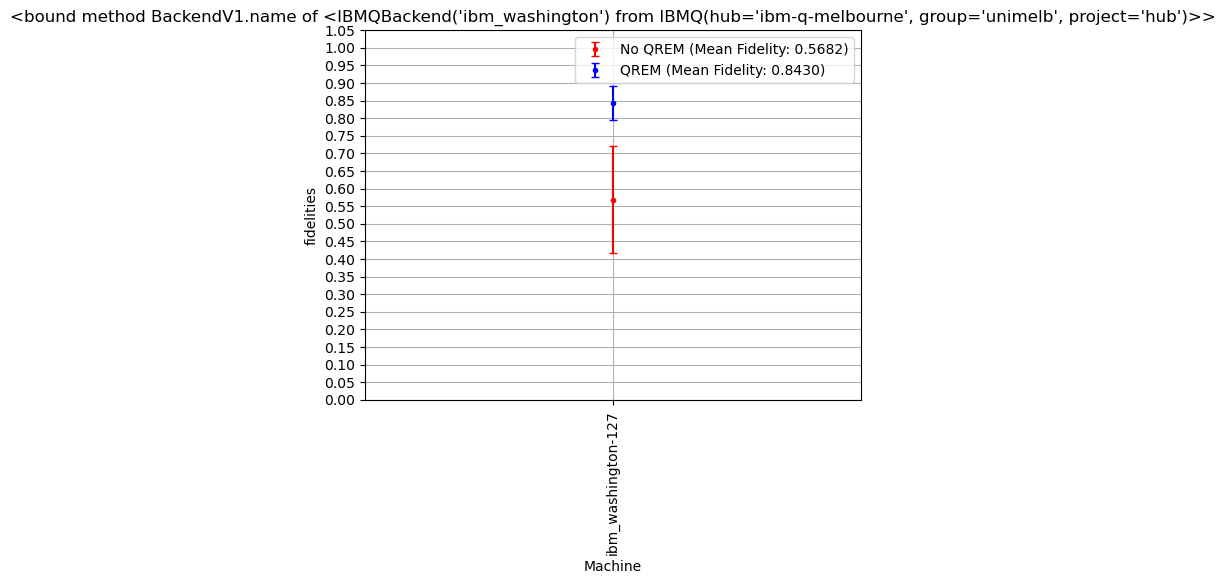

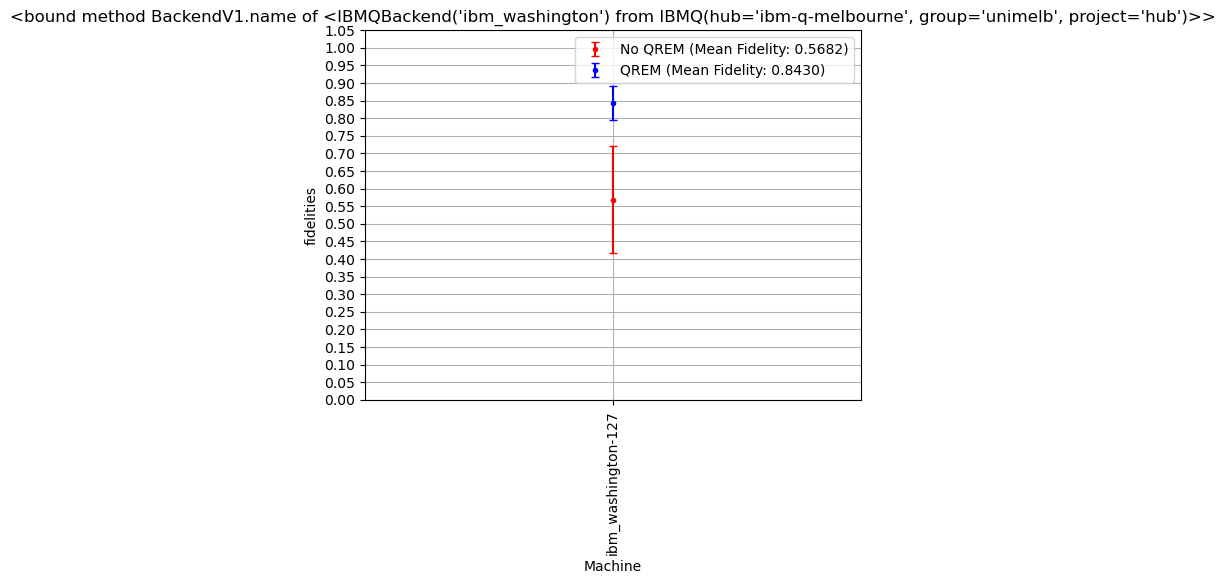

In [4]:
#GS on 20 qubits
backend = provider.get_backend('ibm_washington')
test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,5,6,7,8,14,15,16,18,19,20,21,22,23,24,25])

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('0b7837b3bc0648c297b320e051011828-16829895926696873', provider)
print('job set retrieved')
results = job_set.results()
print('results get')
result = results.combine_results()
print('results combined')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
print('Unmitigated moments get')
moments_dict_mit = test.moments_from_result(result, apply_mit = 'M3', order = 4, filename = 'calibrations/ibm_washington_cal_109faulty.json')
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')
plot_fidelities(fidelities, backend, fidelities_mit)

In [14]:
print(np.std(fidelities)/np.sqrt(6))
print(np.std(fidelities_mit)/np.sqrt(7))
print(f'Ground State energy: {energies}')
print(f'Mitigated Ground State energy: {energies_mit}')
print(np.mean(energies[:2]+energies[3:]))
print(np.mean(energies_mit))
print(np.std(energies[:2]+energies[3:])/np.sqrt(7))
print(np.std(energies_mit)/np.sqrt(8))

0.15171871095263326
0.04745919017064782
Ground State energy: [(-0.9683664634413613+0j), (-0.8839622263788849+0j), (-1.1619379155282803+0.2584524170127572j), (-0.7347219163601855+0.11472082336054798j), (-0.868667835356811+0j), (-0.82173977738217+0j), (-0.9580649520407194+0j), (-0.8363269791494077+0j)]
Mitigated Ground State energy: [(-0.8567598447106893+0j), (-0.8653387427687127+0j), (-0.8841582670649849+0j), (-0.7553530452671626+0.1286397196583622j), (-0.8717555087081827+0j), (-0.8285196189932764+0j), (-0.867901892096763+0j), (-0.8247883596844616+0j)]
(-0.8674071643013628+0.016388689051506852j)
(-0.8443219099117792+0.016079964957295276j)
0.032142819206830486
0.020355569296213842


GraphState Result: Washington (20 qubits) (reduced-QREM test)

In [3]:
#GS on 20 qubits
backend = provider.get_backend('ibm_washington')
test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,5,6,7,8,14,15,16,18,19,20,21,22,23,24,25])

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('0b7837b3bc0648c297b320e051011828-16829895926696873', provider)
print('job set retrieved')
results = job_set.results()
print('results get')
result = results.combine_results()
print('results combined')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

#counts_list = test.counts_from_result(result, order = 4)
#test.reps = 4
#test.gen_M_list(result)
#counts_list_mit = test.apply_reduced_qrem(counts_list, mitigate_qubits = [3,4,5,6,18,20,23,24])
#counts_list_mit = test.apply_reduced_qrem(counts_list, 
#                                          mitigate_qubits = [0,1,2,3,4,5,6,7,8,14,15,16,18,19,20,21,22,23,24,25])
#moments_dict_mit = test.calc_moments_from_counts(counts_list_mit)
moments_dict_mit = test.moments_from_result(result, apply_mit = 'reduced_QREM', order = 4,
                                            mitigate_qubits = [3,4,5])
print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Mitigated Fidelities: {fidelities_mit}')
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')

Time elapsed: 0.15 s
340
6196
Time elapsed: 0.64 s
job set retrieved
results get
results combined
Time elapsed: 749.16 s
ZZXZZZXZZXXXZXZXZXZX done
ZXZXZYYZZZXXXZXZZXZX done
ZYYZZXZXZZXXXZXZZZXZ done
XZZXZZXZZZXXXZXZZXZX done
ZXZXZXZXZXZXZXZYYZXZ done
ZXZXZXZZXZXZXZXZZXZX done
XZXZZXZZXZXZXZZXZZXZ done
ZYYZZZXZXXXZZXZXZZXZ done
ZZXZYZXZXYYZYZYYZXZX done
XZYYZXZXZZXXXZXZZYYZ done
XZXZXZXZXZZZXZZXZZXZ done
ZZXZXZXZXXZZZXZXZYYZ done
XZXZZZYYZZYXXZXZYZZX done
ZXZZXZZXZZZXXZXZXZXZ done
ZXZXZYYZZYZXYZXZXZYY done
XZZXZZXZZZZXZXZZXZZX done
YZZXZZYYZXXXYZZXZXZX done
ZXZZXZZXZZZXYYZXZXZX done
XZXZZXZZXZXZXZYYZXZX done
XZZXZYYZXZYZZXZZYZXZ done
XZZXZZXZXZZZXZXZYYZX done
ZXZZYXYZYXZYZZXZZYYZ done
ZXZXZZXZYXXYZXZXZZXZ done
ZXZZXZZYYXZZZYYZXZXZ done
YZXZZXZXZYXXZZYYZXZX done
YZXZXZXZYYZYZXZZXZYY done
ZXZXZXZXZZXXXZZXZXZX done
YYZXZXZXZZYXXZXZYZXZ done
ZXZXZZXZXXXZZZXZZXZX done
ZYYZYYZZXZZZYYZYYZYY done
XZYYZZXZXZXZZXZXZXZX done
YXYZYYZXZZZXXZYXXYZX done
ZXZZXZXZXYZZYZYYZZXZ done
YYZXZZYXYZXZZXZXZXZX 

In [3]:
def s_star(C2,C3,C4):
    delta = (3*(C3**2))-(2*C2*C4)
    sqrt = np.sqrt(delta)
    return (C2**3*(delta-C3*sqrt))/(delta*(C3**2-C2*C4))

def delta(C2,C3,C4):
    return (3*(C3**2))-(2*C2*C4)

c2 = np.array([(0.030528997500000044+0j), (0.03129768759999996+0j), (0.03928177750000067+0j), (0.03875996000000026+0j), (0.03244162560000008+0j), (0.033951030399999804+0j), (0.036299873599999866+0j), (0.041616529600000396+0j)])
c3 = np.array([(0.0020172006502506626+0j), (0.003517096097136664+0j), (0.005121795396751609+0j), (0.005353815984000802+0j), (0.0034011825730558276+0j), (0.002728239439486864+0j), (0.002123935789823443+0j), (-0.005980137926783237+0j)])
c4 = np.array([(-0.0005858489631271058+0j), (-0.002613544115641707+0j), (0.0011089387866439846+0j), (0.009201885852792557+0j), (-0.0034736433094233188+0j), (-0.011437607403334011+0j), (-0.0008924429612562059+0j), (-0.013958746399684824+0j)])

c2_mit = np.array([(0.02516670818278588+0j), (0.026673421587245394+0j), (0.03912235852121826+0j), (0.038211420127837736+0j), (0.03208178591424449+0j), (0.029819801193554984+0j), (0.03437468756882878+0j), (0.03943518473382901+0j)])
c3_mit = np.array([(-0.0030195469245737003+0j), (-0.0002026644481336326+0j), (0.004159139200775389+0j), (0.004492403994390298+0j), (0.004215770598560903+0j), (-0.00028127090665135135+0j), (0.00045053682023014213+0j), (-0.012317396698351434+0j)])
c4_mit = np.array([(-0.008438199853917472+0j), (-0.009379066836736515+0j), (-0.0021632319844541517+0j), (0.006995934289472037+0j), (-0.0048442001145748426+0j), (-0.017709761902360302+0j), (-0.004625071162815344+0j), (-0.024199712924091565+0j)])
print(1-s_star(c2,c3,c4))
print(1-s_star(c2_mit,c3_mit,c4_mit))

[0.08140679+0.j         0.75526137+0.j         4.4979812 +6.17284595j
 1.17753104+0.03794779j 0.7831725 +0.j         0.91066052+0.j
 0.01501432+0.j         0.86349995+0.j        ]
[0.91781019+0.j        0.92346798+0.j        0.57683943+0.j
 1.2257519 +0.0465772j 0.85145798+0.j        0.94936232+0.j
 0.75128508+0.j        0.93050519+0.j       ]


GraphState Result: ibm_sherbrooke (20-qubit)

In [4]:
#GS on 20 qubits
backend = provider.get_backend('ibm_sherbrooke')
test = MomentMethod(backend, qubits_to_connect = [37,38,39,40,41,42,43,44,45,52,53,54,56,57,58,59,60,61,62,63])

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('f6c98867066b473c980c465b6408a301-1683030712032127', provider)
print('job set retrieved')
results = job_set.results()
print('results get')
result = results.combine_results()
print('results combined')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
print('Unmitigated moments get')
moments_dict_mit = test.moments_from_result(result, apply_mit = 'M3', order = 4)
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')
plot_fidelities(fidelities, backend, fidelities_mit)

Time elapsed: 0.14 s
340
6196
Time elapsed: 0.58 s
job set retrieved
results get
results combined
Time elapsed: 1051.88 s
rep0 done
rep1 done
rep2 done
rep3 done
rep4 done
rep5 done
rep6 done
rep7 done
Unmitigated moments get
rep 0 done
rep 1 done
rep 2 done
rep 3 done
rep 4 done
rep 5 done
rep 6 done
rep 7 done
rep0 done
rep1 done
rep2 done
rep3 done
rep4 done
rep5 done
rep6 done
rep7 done
Moments: {1: [(-0.84775+0j), (-0.8364400000000001+0j), (-0.8337899999999999+0j), (-0.84257+0j), (-0.8382700000000001+0j), (-0.83308+0j), (-0.8234299999999999+0j), (-0.8235499999999999+0j)], 2: [(0.7488200000000003+0j), (0.7289170000000001+0j), (0.7225630000000002+0j), (0.7381130000000002+0j), (0.7298970000000005+0j), (0.7209679999999999+0j), (0.7090169999999999+0j), (0.7128510000000002+0j)], 3: [(-0.676925199999999+0j), (-0.6537390999999996+0j), (-0.6445484999999992+0j), (-0.6627989000000004+0j), (-0.6534500499999996+0j), (-0.6415775499999998+0j), (-0.6297656000000004+0j), (-0.6392100499999998+0j)],

NameError: name 'plot_fidelities' is not defined

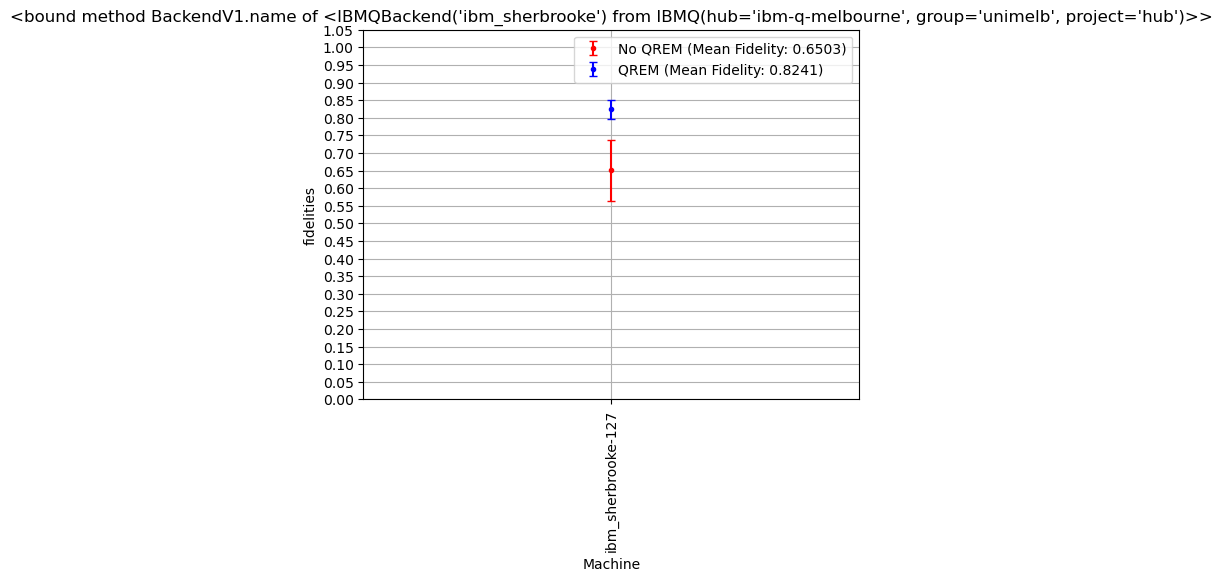

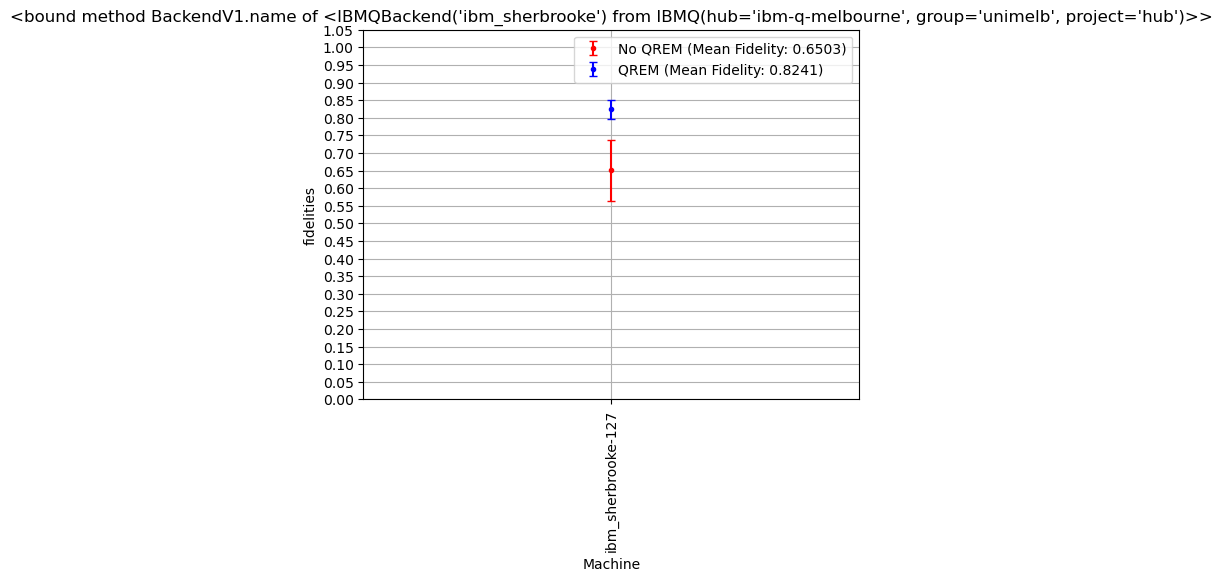

In [6]:
plot_fidelities(fidelities, backend, fidelities_mit)

GraphState Result: ibm_brisbane (20-qubit)

Time elapsed: 0.14 s
340
6196
Time elapsed: 0.70 s
job set retrieved
results get
results combined
Time elapsed: 904.07 s
Unmitigated moments get
ZZXZZZXZZXXXZXZXZXZX done
ZXZXZYYZZZXXXZXZZXZX done
ZYYZZXZXZZXXXZXZZZXZ done
XZZXZZXZZZXXXZXZZXZX done
ZXZXZXZXZXZXZXZYYZXZ done
ZXZXZXZZXZXZXZXZZXZX done
XZXZZXZZXZXZXZZXZZXZ done
ZYYZZZXZXXXZZXZXZZXZ done
ZZXZYZXZXYYZYZYYZXZX done
XZYYZXZXZZXXXZXZZYYZ done
XZXZXZXZXZZZXZZXZZXZ done
ZZXZXZXZXXZZZXZXZYYZ done
XZXZZZYYZZYXXZXZYZZX done
ZXZZXZZXZZZXXZXZXZXZ done
ZXZXZYYZZYZXYZXZXZYY done
XZZXZZXZZZZXZXZZXZZX done
YZZXZZYYZXXXYZZXZXZX done
ZXZZXZZXZZZXYYZXZXZX done
XZXZZXZZXZXZXZYYZXZX done
XZZXZYYZXZYZZXZZYZXZ done
XZZXZZXZXZZZXZXZYYZX done
ZXZZYXYZYXZYZZXZZYYZ done
ZXZXZZXZYXXYZXZXZZXZ done
ZXZZXZZYYXZZZYYZXZXZ done
YZXZZXZXZYXXZZYYZXZX done
YZXZXZXZYYZYZXZZXZYY done
ZXZXZXZXZZXXXZZXZXZX done
YYZXZXZXZZYXXZXZYZXZ done
ZXZXZZXZXXXZZZXZZXZX done
ZYYZYYZZXZZZYYZYYZYY done
XZYYZZXZXZXZZXZXZXZX done
YXYZYYZXZZZXXZYXXYZX done
ZXZZXZXZXYZZYZYYZZXZ do

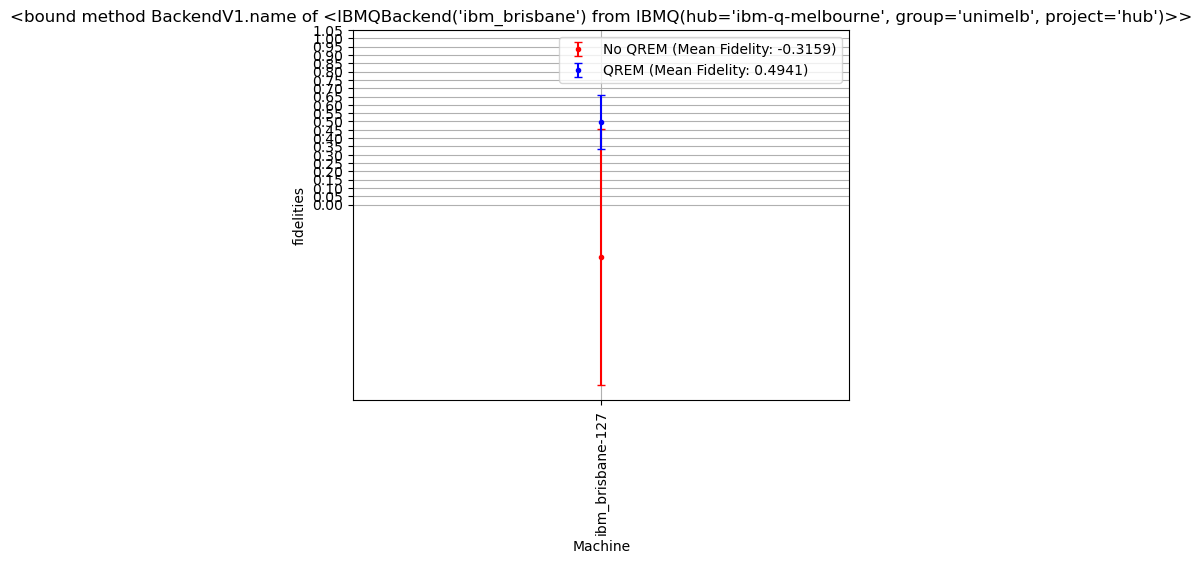

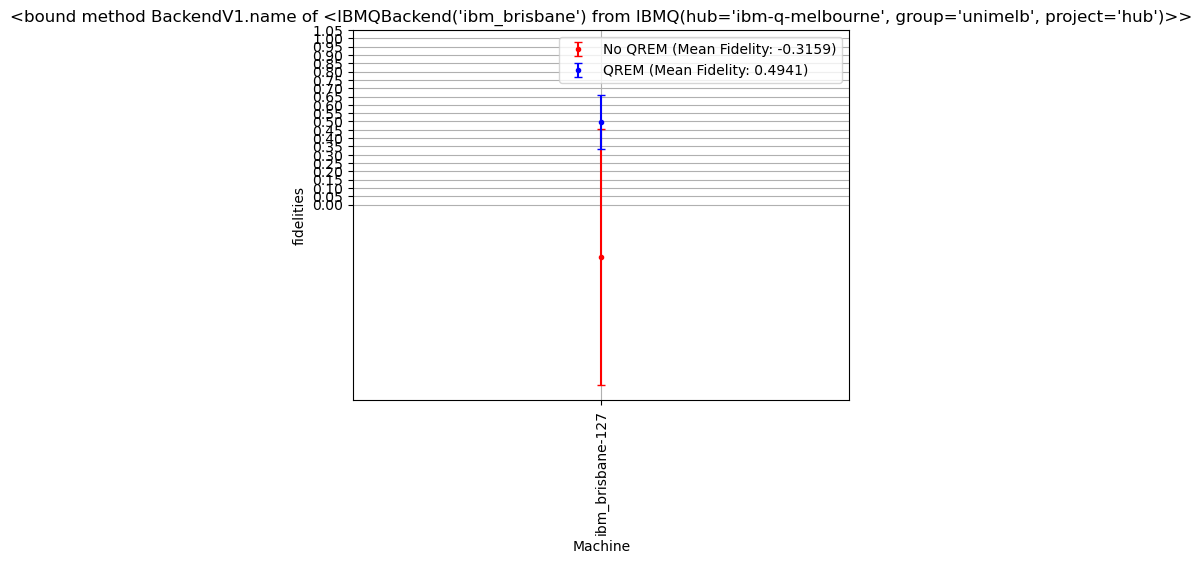

In [3]:
#GS on 20 qubits
backend = provider.get_backend('ibm_brisbane')
test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,5,6,7,8,14,15,16,18,19,20,21,22,23,24,25])

time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

job_manager = IBMQJobManager()
job_set = job_manager.retrieve_job_set('60e02c624b56460eb711043f8d56883f-16828416965252225', provider)
print('job set retrieved')
results = job_set.results()
print('results get')
result = results.combine_results()
print('results combined')
time3 = time()
print(f'Time elapsed: {time3 - time2:.2f} s')

moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
print('Unmitigated moments get')
moments_dict_mit = test.moments_from_result(result, apply_mit = 'M3', order = 4)
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')
time5 = time()
print(f'Time elapsed: {time5 - time4:.2f} s')
plot_fidelities(fidelities, backend, fidelities_mit)

Moments: {1: [(-0.75536+0j), (-0.77427+0j), (-0.75706+0j), (-0.7288+0j), (-0.74787+0j), (-0.75564+0j), (-0.7694599999999999+0j), (-0.77495+0j)], 2: [(0.6068560000000002+0j), (0.6336210000000004+0j), (0.6070670000000002+0j), (0.5685900000000007+0j), (0.5981380000000004+0j), (0.6084520000000003+0j), (0.624376+0j), (0.6332550000000002+0j)], 3: [(-0.5074936999999996+0j), (-0.5386120499999999+0j), (-0.5068165000000002+0j), (-0.4652301999999999+0j), (-0.49801275000000017+0j), (-0.5092863000000003+0j), (-0.5271246500000004+0j), (-0.5367081500000008+0j)], 4: [(0.4381828899999985+0j), (0.4696874099999998+0j), (0.43424219000000025+0j), (0.3964505099999995+0j), (0.42950860000000024+0j), (0.44317870000000037+0j), (0.4612579899999993+0j), (0.4679688899999996+0j)]}
Mitigated Moments: {1: [(-0.7637834035348543+0j), (-0.7846807495794235+0j), (-0.7659110971699397+0j), (-0.7341223641972389+0j), (-0.7556960813769443+0j), (-0.7647909322862103+0j), (-0.7790201271088084+0j), (-0.7852441013522284+0j)], 2: [(

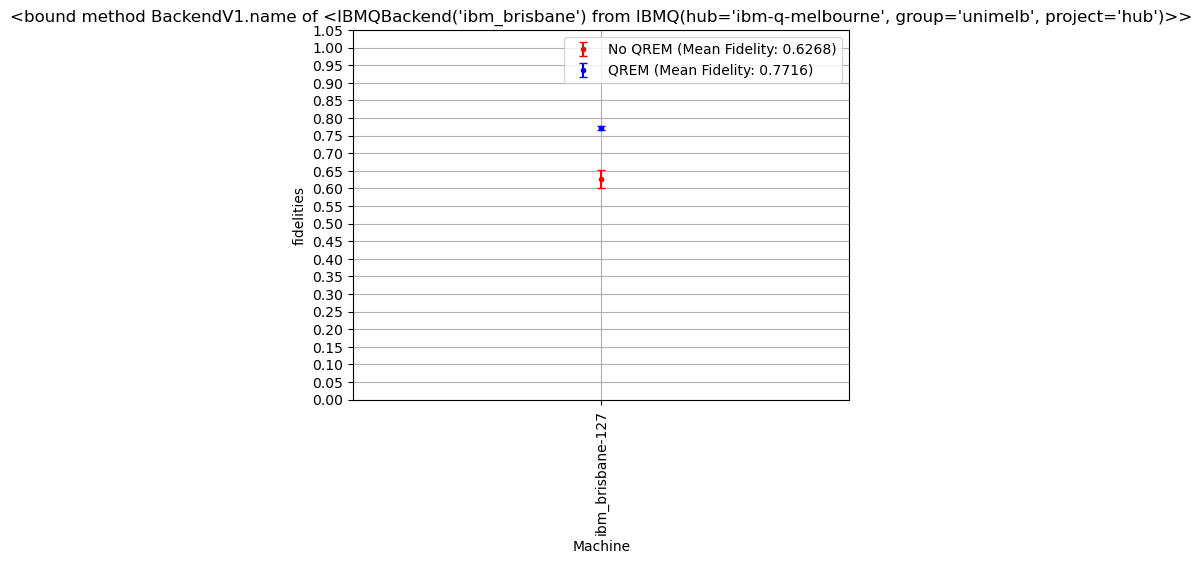

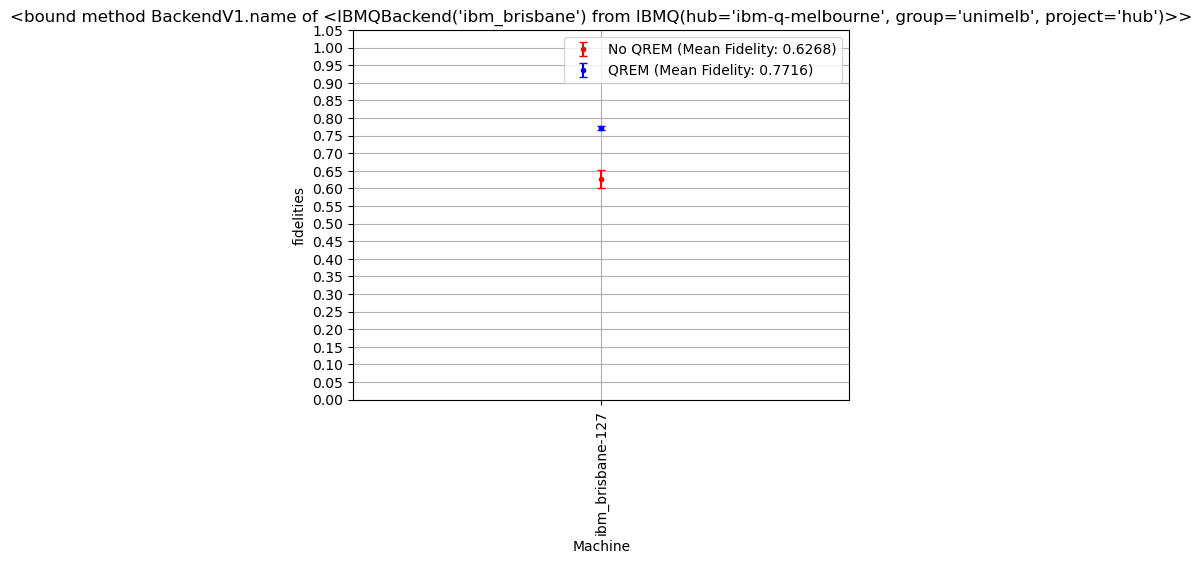

In [43]:
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')
print(f'Ground State energy: {np.mean(energies)}')
print(f'Mitigated Ground State energy: {np.mean(energies_mit)}')

plot_fidelities([0.59200142+0.j,  0.66163523+0.j], backend, [0.76467319+0.j,  0.77844148+0.j])

In [ ]:
time1 = time()
with open('washington_class_data.pkl', 'rb') as inp:
    test = pickle.load(inp)
test.moment_circuits = None
test.TPB_sets = None
test.reps = 1
test.shots = 4096
with open('washington_counts2.pkl', 'rb') as inp:
    counts_list = pickle.load(inp)
#with open('washington_counts_mit2.pkl', 'rb') as inp:
#    counts_list_mit = pickle.load(inp)
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

moments_dict = test.calc_moments_from_counts(counts_list)
#moments_dict_mit = test.calc_moments_from_counts(counts_list_mit)
print(f'Moments: {moments_dict}')
#print(f'Mitigated Moments: {moments_dict_mit}')
time3 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')

cummulants = test.cummulants_from_moments(moments_dict)
#cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
#print(f'Mitigated Cummulants: {cummulants_mit}')

s_stars = test.s_star_from_cummulants(cummulants)
#s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
#fidelities_mit = np.ones(8)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
#print(f'Mitigated Fidelities: {fidelities_mit}')

energies = test.energy_from_cummualnts(cummulants)
#energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
#print(f'Ground State energy Mitigated: {np.mean(energies_mit)}')
time4 = time()
print(f'Time elapsed: {time4 - time3:.2f} s')


Time elapsed: 0.468 s
Moments: {1: [(-0.8409830729166666+0j), (-0.8413085937499998+0j), (-0.8421223958333333+0j), (-0.841796875+0j), (-0.8475748697916665+0j), (-0.8384602864583333+0j), (-0.8417154947916666+0j), (-0.8448079427083333+0j)], 2: [(0.7996419270833335+0j), (0.8003472222222223+0j), (0.799587673611111+0j), (0.7976074218749999+0j), (0.8029513888888888+0j), (0.7975260416666667+0j), (0.7960340711805557+0j), (0.8028700086805556+0j)], 3: [(-0.7699019820601852+0j), (-0.7708875868055555+0j), (-0.7718596281828702+0j), (-0.7716064453124999+0j), (-0.7771312572337965+0j), (-0.7662443938078703+0j), (-0.7685863353587962+0j), (-0.7726598668981483+0j)], 4: [(0.7565375434027778+0j), (0.7575834297839504+0j), (0.7572187258873457+0j), (0.7542227285879628+0j), (0.7596902729552468+0j), (0.753933376736111+0j), (0.7518777729552468+0j), (0.7588855131172839+0j)]}
Mitigated Moments: {1: [(-0.9670285497208225+0j), (-0.966552856873404+0j), (-0.9671931916828151+0j), (-0.966111790310458+0j), (-0.97203936220

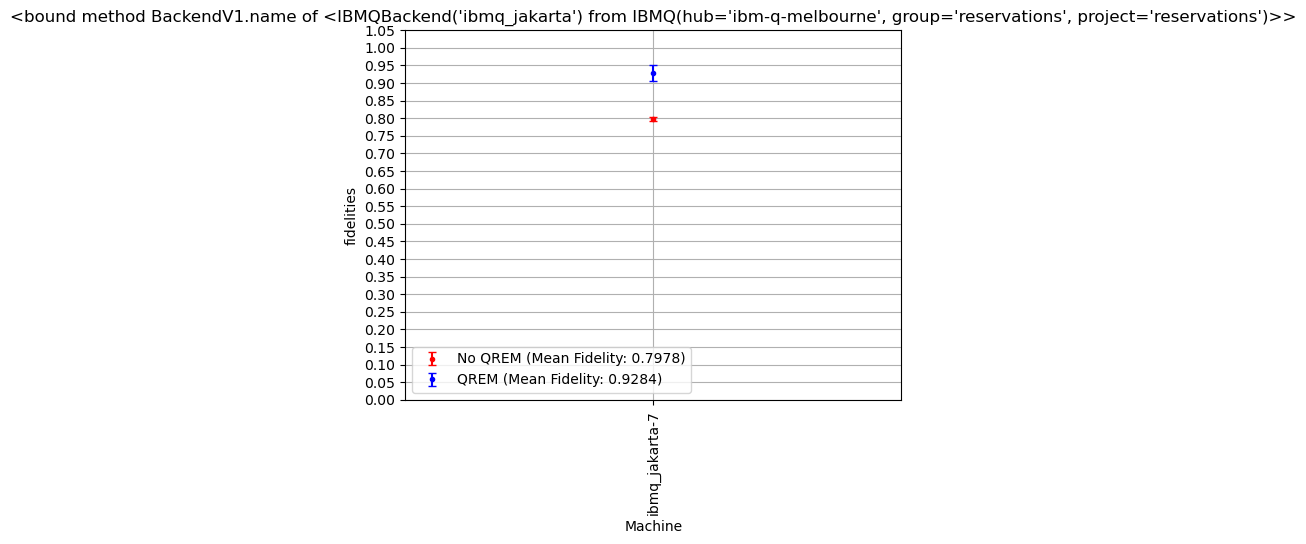

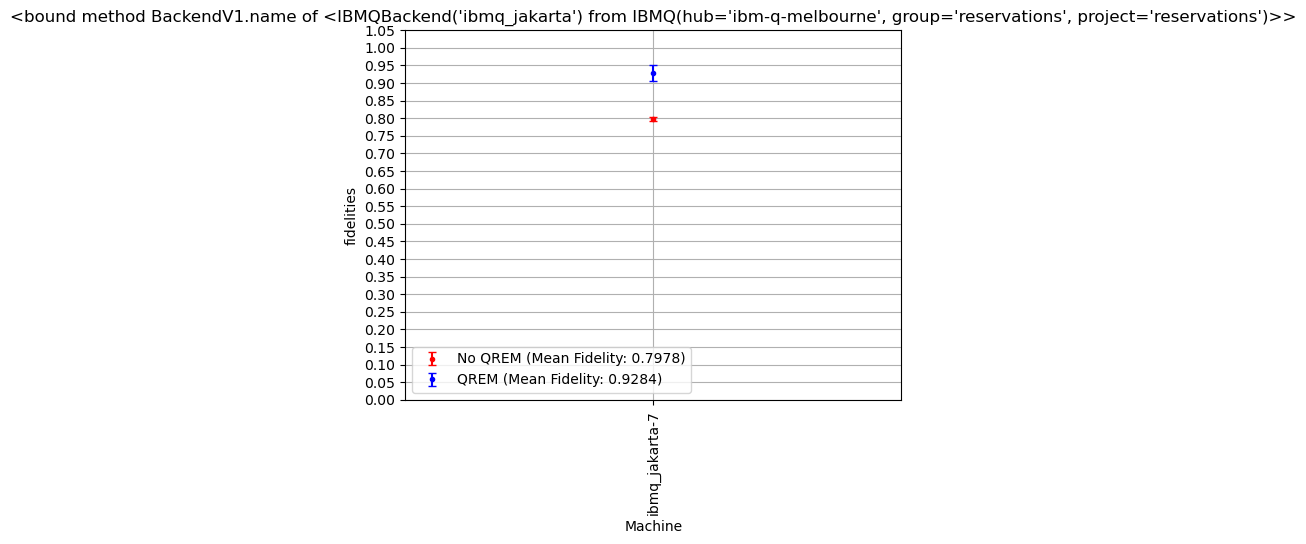

In [9]:
backend = provider.get_backend('ibmq_jakarta')
test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,4,5])

#job_manager = IBMQJobManager()
#job_set = job_manager.retrieve_job_set('81a2effa1eb34322b18def39ccba650d-1679484711969343', provider)
#results = job_set.results()
#result = results.combine_results()

job = backend.retrieve_job('64263eb0992a3344bc4f0928')
#job = backend.retrieve_job('64277fcef2aadd4247a4a901')
#job = backend.retrieve_job('6424fcd513be5d498c94eba6')

result = job.result()
#print(result.get_counts('ZXZZYYZ-0'))
#test.moment_circuits['ZXZZYYZ'].draw()
#basis_counts_list, basis_pvecs_list = test.counts_from_result(result, order = 4)
#print(basis_counts_list[0]['ZXZZYYZ'])
#print(basis_pvecs_list[0]['ZXZZYYZ'])
#print(test.M_list)
#pvecs_mit_list = test.apply_qrem(basis_pvecs_list)
#print(pvecs_mit_list[0]['ZXZZYYZ'])
time1 = time()
moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
moments_dict_mit = test.moments_from_result(result, apply_mit = 'QREM', order = 4)
time2 = time()

print(f'Time elapsed: {time2 - time1:.3f} s')
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)

fidelities = np.ones(8)-np.array(s_stars)
fidelities_mit = np.ones(8)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')

energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Ground State energy Mitigated: {np.mean(energies_mit)}')

plot_fidelities(fidelities, backend, fidelities_mit)

Time elapsed: 0.143 s
Moments: {1: [(-0.837890625+0j), (-0.8376953125000002+0j), (-0.84560546875+0j), (-0.84052734375+0j), (-0.8426757812500001+0j), (-0.844140625+0j), (-0.8353515625000001+0j), (-0.8338867187500001+0j)], 2: [(0.7998046875000002+0j), (0.8027734375000002+0j), (0.8023828125000001+0j), (0.8065625000000001+0j), (0.8060156250000001+0j), (0.8056250000000003+0j), (0.7983984375000001+0j), (0.7981640625+0j)], 3: [(-0.7674375000000002+0j), (-0.7701015625000003+0j), (-0.7735585937500002+0j), (-0.7706601562500001+0j), (-0.7733476562500002+0j), (-0.7724218750000003+0j), (-0.7623671875000001+0j), (-0.7664101562500002+0j)], 4: [(0.7538156250000002+0j), (0.7579843750000003+0j), (0.7576781250000002+0j), (0.7603437500000002+0j), (0.7605000000000002+0j), (0.7593500000000003+0j), (0.7536281250000002+0j), (0.7542843750000001+0j)]}
Mitigated Moments: {1: [(-0.9774800394057467+0j), (-0.9775666898972486+0j), (-0.9836510743664792+0j), (-0.9824737777810082+0j), (-0.9839976504130291+0j), (-0.9824

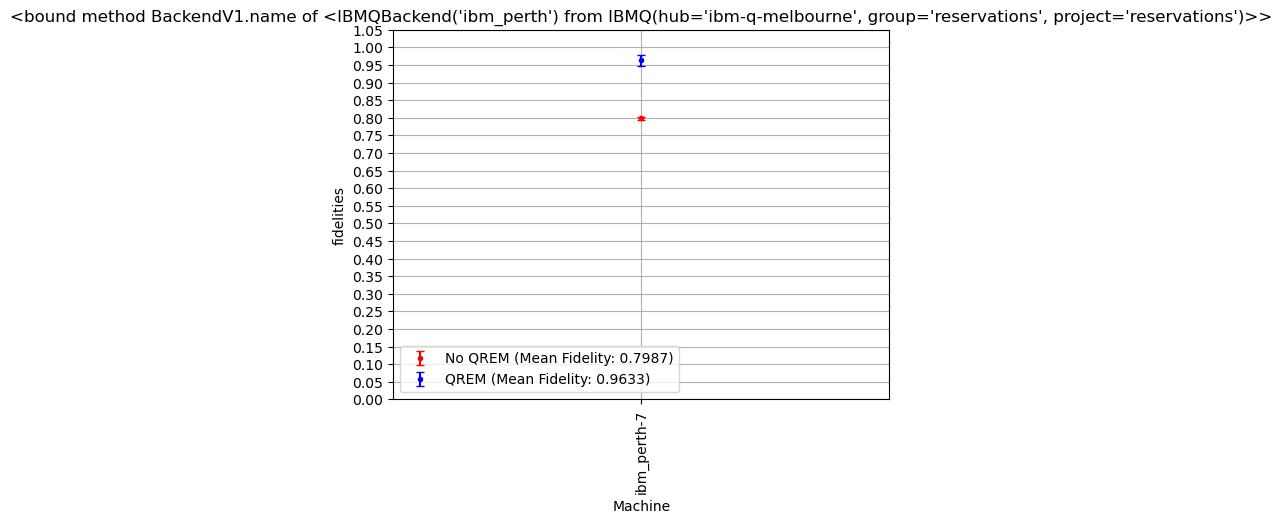

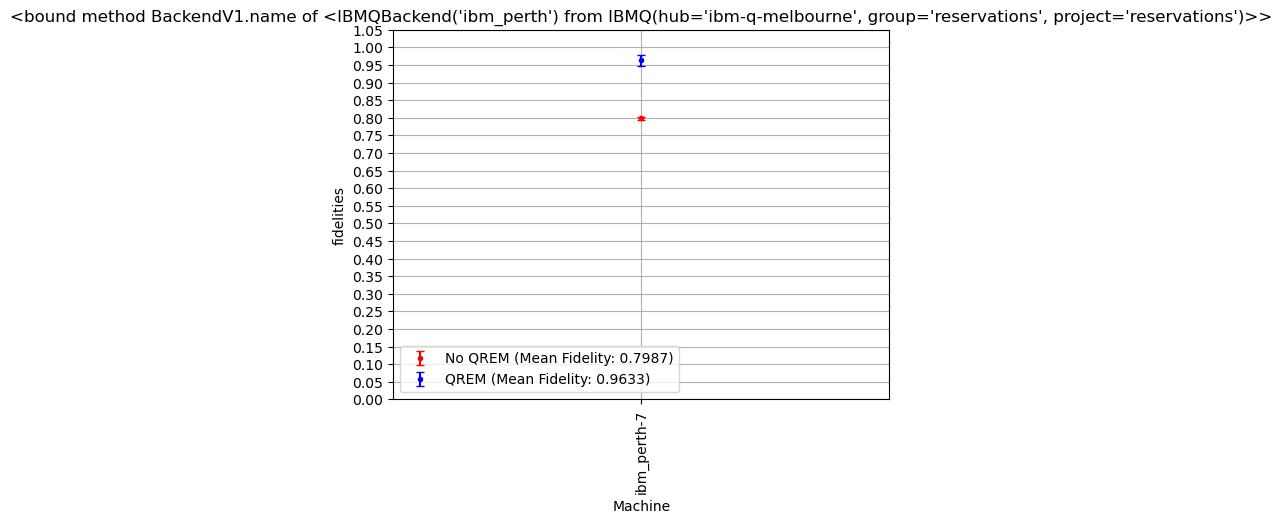

In [12]:
backend = provider.get_backend('ibm_perth')
test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,5])

#job_manager = IBMQJobManager()
#job_set = job_manager.retrieve_job_set('81a2effa1eb34322b18def39ccba650d-1679484711969343', provider)
#results = job_set.results()
#result = results.combine_results()


job = backend.retrieve_job('6417f45f35fe85090a01b6d5')
#job = backend.retrieve_job('641053eaa6f4d2a32c803cee')
#job = backend.retrieve_job('64096a088c60d51b05e68faa')
result = job.result()
#print(result.get_counts('ZXZZYYZ-0'))
#test.moment_circuits['ZXZZYYZ'].draw()
#basis_counts_list, basis_pvecs_list = test.counts_from_result(result, order = 4)
#print(basis_counts_list[0]['ZXZZYYZ'])
#print(basis_pvecs_list[0]['ZXZZYYZ'])
#print(test.M_list)
#pvecs_mit_list = test.apply_qrem(basis_pvecs_list)
#print(pvecs_mit_list[0]['ZXZZYYZ'])
time1 = time()
moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
moments_dict_mit = test.moments_from_result(result, apply_mit = 'QREM', order = 4)
time2 = time()

print(f'Time elapsed: {time2 - time1:.3f} s')
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')
cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')
s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)

fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')

energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Ground State energy Mitigated: {np.mean(energies_mit)}')

plot_fidelities(fidelities, backend, fidelities_mit)

In [3]:
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23,24])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23,24,25])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,18,19,21,22,23,24,25,26])
#test = MomentMethod(backend, qubits_to_connect=[12,13,14,15,16,17,18,19,21,22,23,24,25,26])
#test = MomentMethod(backend, qubits_to_connect = [11,12,13,14,15,16,17,18,19,21,22,23,24,25,26])
test = MomentMethod(backend, qubits_to_connect = [10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26])
time0 = time()
test.gen_Hamiltonian_powers(order = 4)
time1 = time()
print(f'Time elapsed: {time1 - time0:.2f} s')
test.gen_TPB_set()
print(len(test.TPB_sets))
total_basis = 0
for i in test.TPB_sets:
    total_basis += len(i) - 1
print(total_basis)
test.gen_measurement_circuits()
time2 = time()
print(f'Time elapsed: {time2 - time1:.2f} s')

#job = provider.backend.retrieve_job('ci99lep02cefj72e9amg') #7q
#job = provider.backend.retrieve_job('ci99lsp61rck8jqiqpv0') #8q
#job = provider.backend.retrieve_job('ci99m4h61rck8jqirbqg') #9q
#job = provider.backend.retrieve_job('ci99mhgk82m1odcgf6o0') #10q
#job = provider.backend.retrieve_job('ci99nch02cefj72ee3ng') #11q
#job = provider.backend.retrieve_job('ci99nqok82m1odcgi56g') #12q
#job = provider.backend.retrieve_job('ci99ok161rck8jqj0rmg') #13q
#job = provider.backend.retrieve_job('ci99p2hg5luj4cib16eg') #14q
#job = provider.backend.retrieve_job('cj76gfclik6102utqvlg') #15q
job = provider.backend.retrieve_job('cj76hgdtks61ugt0as8g') #16q

result = job.result()
print('result get')
time1 = time()
moments_dict = test.moments_from_result(result, apply_mit = False, order = 4)
moments_dict_mit = test.moments_from_result(result, apply_mit = 'reduced_QREM',
                                            mitigate_qubits = [10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26])
time2 = time()
print(f'Time elapsed: {time2 - time1:.3f} s')
print(f'Moments: {moments_dict}')
print(f'Mitigated Moments: {moments_dict_mit}')

cummulants = test.cummulants_from_moments(moments_dict)
cummulants_mit = test.cummulants_from_moments(moments_dict_mit)
print(f'Cummulants: {cummulants}')
print(f'Mitigated Cummulants: {cummulants_mit}')

s_stars = test.s_star_from_cummulants(cummulants)
s_stars_mit = test.s_star_from_cummulants(cummulants_mit)
fidelities = np.ones(1)-np.array(s_stars)
fidelities_mit = np.ones(1)-np.array(s_stars_mit)
print(f'Fidelities: {fidelities}')
print(f'Mitigated Fidelities: {fidelities_mit}')

energies = test.energy_from_cummualnts(cummulants)
energies_mit = test.energy_from_cummualnts(cummulants_mit)
print(f'Ground State energy: {np.mean(energies)}')
print(f'Ground State energy err: {np.std(energies)/np.sqrt(len(energies))}')
print(f'Ground State energy Mitigated: {np.mean(energies_mit)}')
print(f'Ground State energy Mitigated err: {np.std(energies_mit)/np.sqrt(len(energies_mit))}')
#plot_fidelities(fidelities, backend, fidelities_mit)

Time elapsed: 0.06 s
268
2517
Time elapsed: 0.46 s
result get
rep0 done
rep1 done
rep2 done
rep3 done
5857
7105
5196
2780
4510
5519
5067
5001
6590
5554
5464
5623
5478
4221
4022
5904
4582
6035
5401
3873
5304
5325
5434
5262
5610
4069
4571
4348
6188
3776
4348
6744
6173
5259
7222
6848
6220
5356
6733
5382
6069
6512
6078
5475
5861
6032
5353
4310
5213
3938
5394
3433
4290
4083
6626
7501
5911
5929
5451
5817
6427
6780
5513
4028
5392
6371
5394
6694
5145
4473
4075
5535
5953
5142
5423
5187
5926
6633
6178
6750
6231
4489
5969
5287
5968
5982
6129
5376
5509
6570
4138
5756
5375
6044
6077
6532
5309
6200
7149
6984
5521
5285
3951
6299
5752
5372
6150
5313
7328
6836
6862
6177
6559
7192
7240
6146
5875
6205
6115
6125
6769
6417
7123
6587
6596
5866
5343
5541
6659
6192
4543
5746
7112
4333
5733
5971
5043
6001
4193
6534
6053
7045
4587
6328
7442
5202
5955
6526
4901
5035
5841
6006
5186
5794
6198
6054
4695
5855
7542
6736
7247
7086
6126
5921
6996
6374
6906
6156
6885
6541
6641
7132
6795
5150
6750
6934
7242
6382
6027
710

In [34]:
print(energies)
print(energies_mit)
print(np.mean([(-0.9555482341489138+0j), (-0.9921930925615043+0j), (-0.985269107587057+0j)]))
print(np.std([(-0.9555482341489138+0j), (-0.9921930925615043+0j), (-0.985269107587057+0j)])/np.sqrt(2))

[(-0.9875471430826095+0j), (-0.9854118723700034+0j), (-0.978442254060989+0j), (-0.9869033673570972+0j)]
[(-0.9892992042357094+0j), (-0.9886527767128095+0j), (-0.9896245557468984+0j)]
(-0.9776701447658249+0j)
0.011240100666639241


In [ ]:
backend = provider.get_backend('ibm_perth')
test = MomentMethod(backend, qubits_to_connect = [0,1,2,3,5])
test.gen_Hamiltonian_powers(order = 4)
test.gen_TPB_set()
pvecs = test.pvecs_from_result(result, order = 4)
print(np.sum(pvecs[5]['YXZXY']))
pvecs_mit = test.apply_qrem(pvecs)
print(np.sum(pvecs_mit[2]['ZXYXY']))
print(test.to_string(test.Hamiltonian_powers, index = 0))
print(test.Hamiltonian_powers)


measurement_basis = test.measurement_mapping[(4,8)]
measurement_string = test.operator_to_string(measurement_basis)
print(measurement_string)
print(np.linalg.inv(test.calc_M_multi(qubits = [0,1,2,3,5])))
print(find_closest_pvec(pvecs_mit[2][measurement_string]))
print(np.sum(find_closest_pvec(pvecs_mit[2][measurement_string])))
expected_val = test.calc_expected_value_from_pvecs(pvecs_mit[2][measurement_string], (4,8))
print(expected_val)

In [ ]:
backend = provider.get_backend('ibm_nairobi')
test = MomentMethod(backend)
job = backend.retrieve_job('64096a088c60d51b05e68faa')
result = job.result()
job_approx_execution_time = result.time_taken 
print(job_approx_execution_time)
